In [232]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis, f_oneway
# Set up the visual style for plots
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

### 1. Data Overview

In [233]:
df = pd.read_csv('Housing.csv')

In [234]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [235]:
df.shape

(545, 13)

In [236]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [238]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [239]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [240]:
# Basic statistical summary for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


### 2. Univariate Analysis

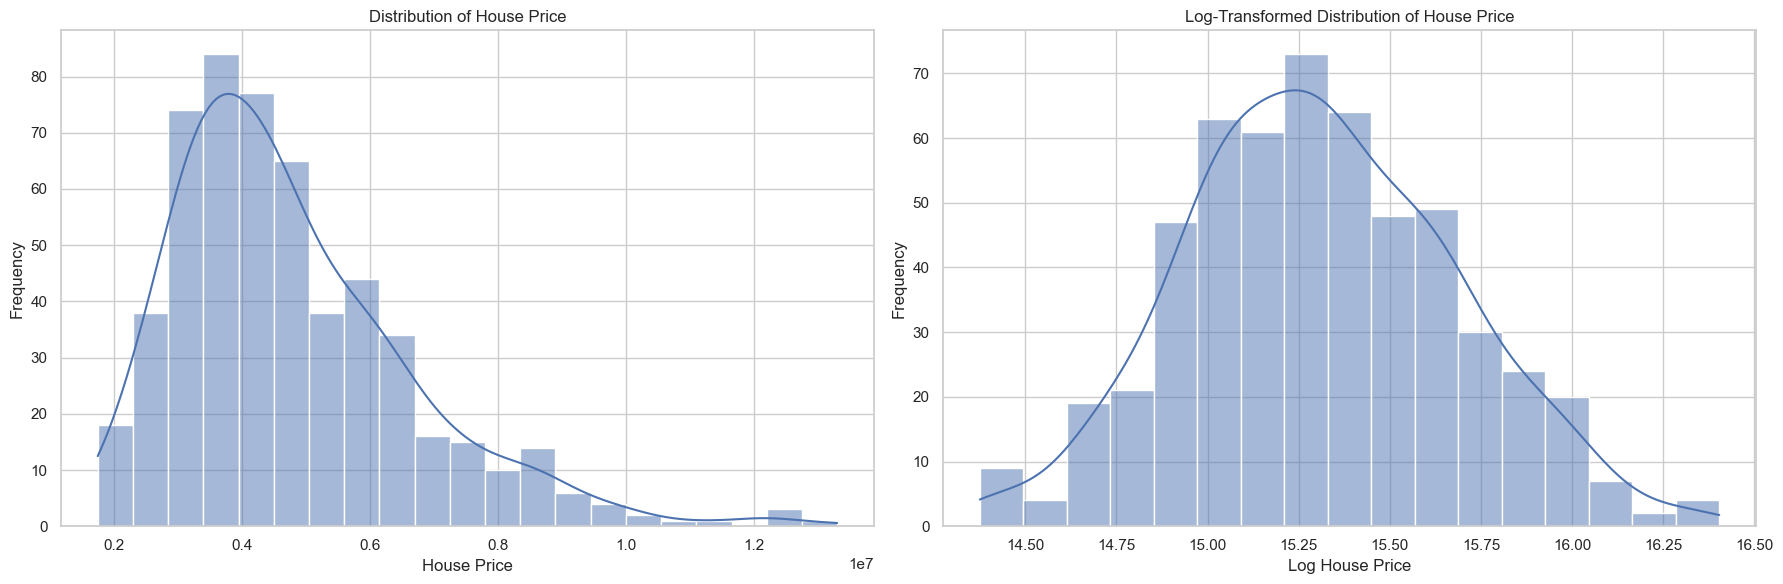

In [241]:
# Histogram and KDE plot for the target variable in a single subplot grid
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Original distribution
sns.histplot(df['price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of House Price')
axes[0].set_xlabel('House Price')
axes[0].set_ylabel('Frequency')

# Log-transformed distribution
df['House Price_log'] = np.log1p(df['price'])
sns.histplot(df['House Price_log'], kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Distribution of House Price')
axes[1].set_xlabel('Log House Price')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


   - **Numerical Features**:
      - **Histograms/KDE Plots**:

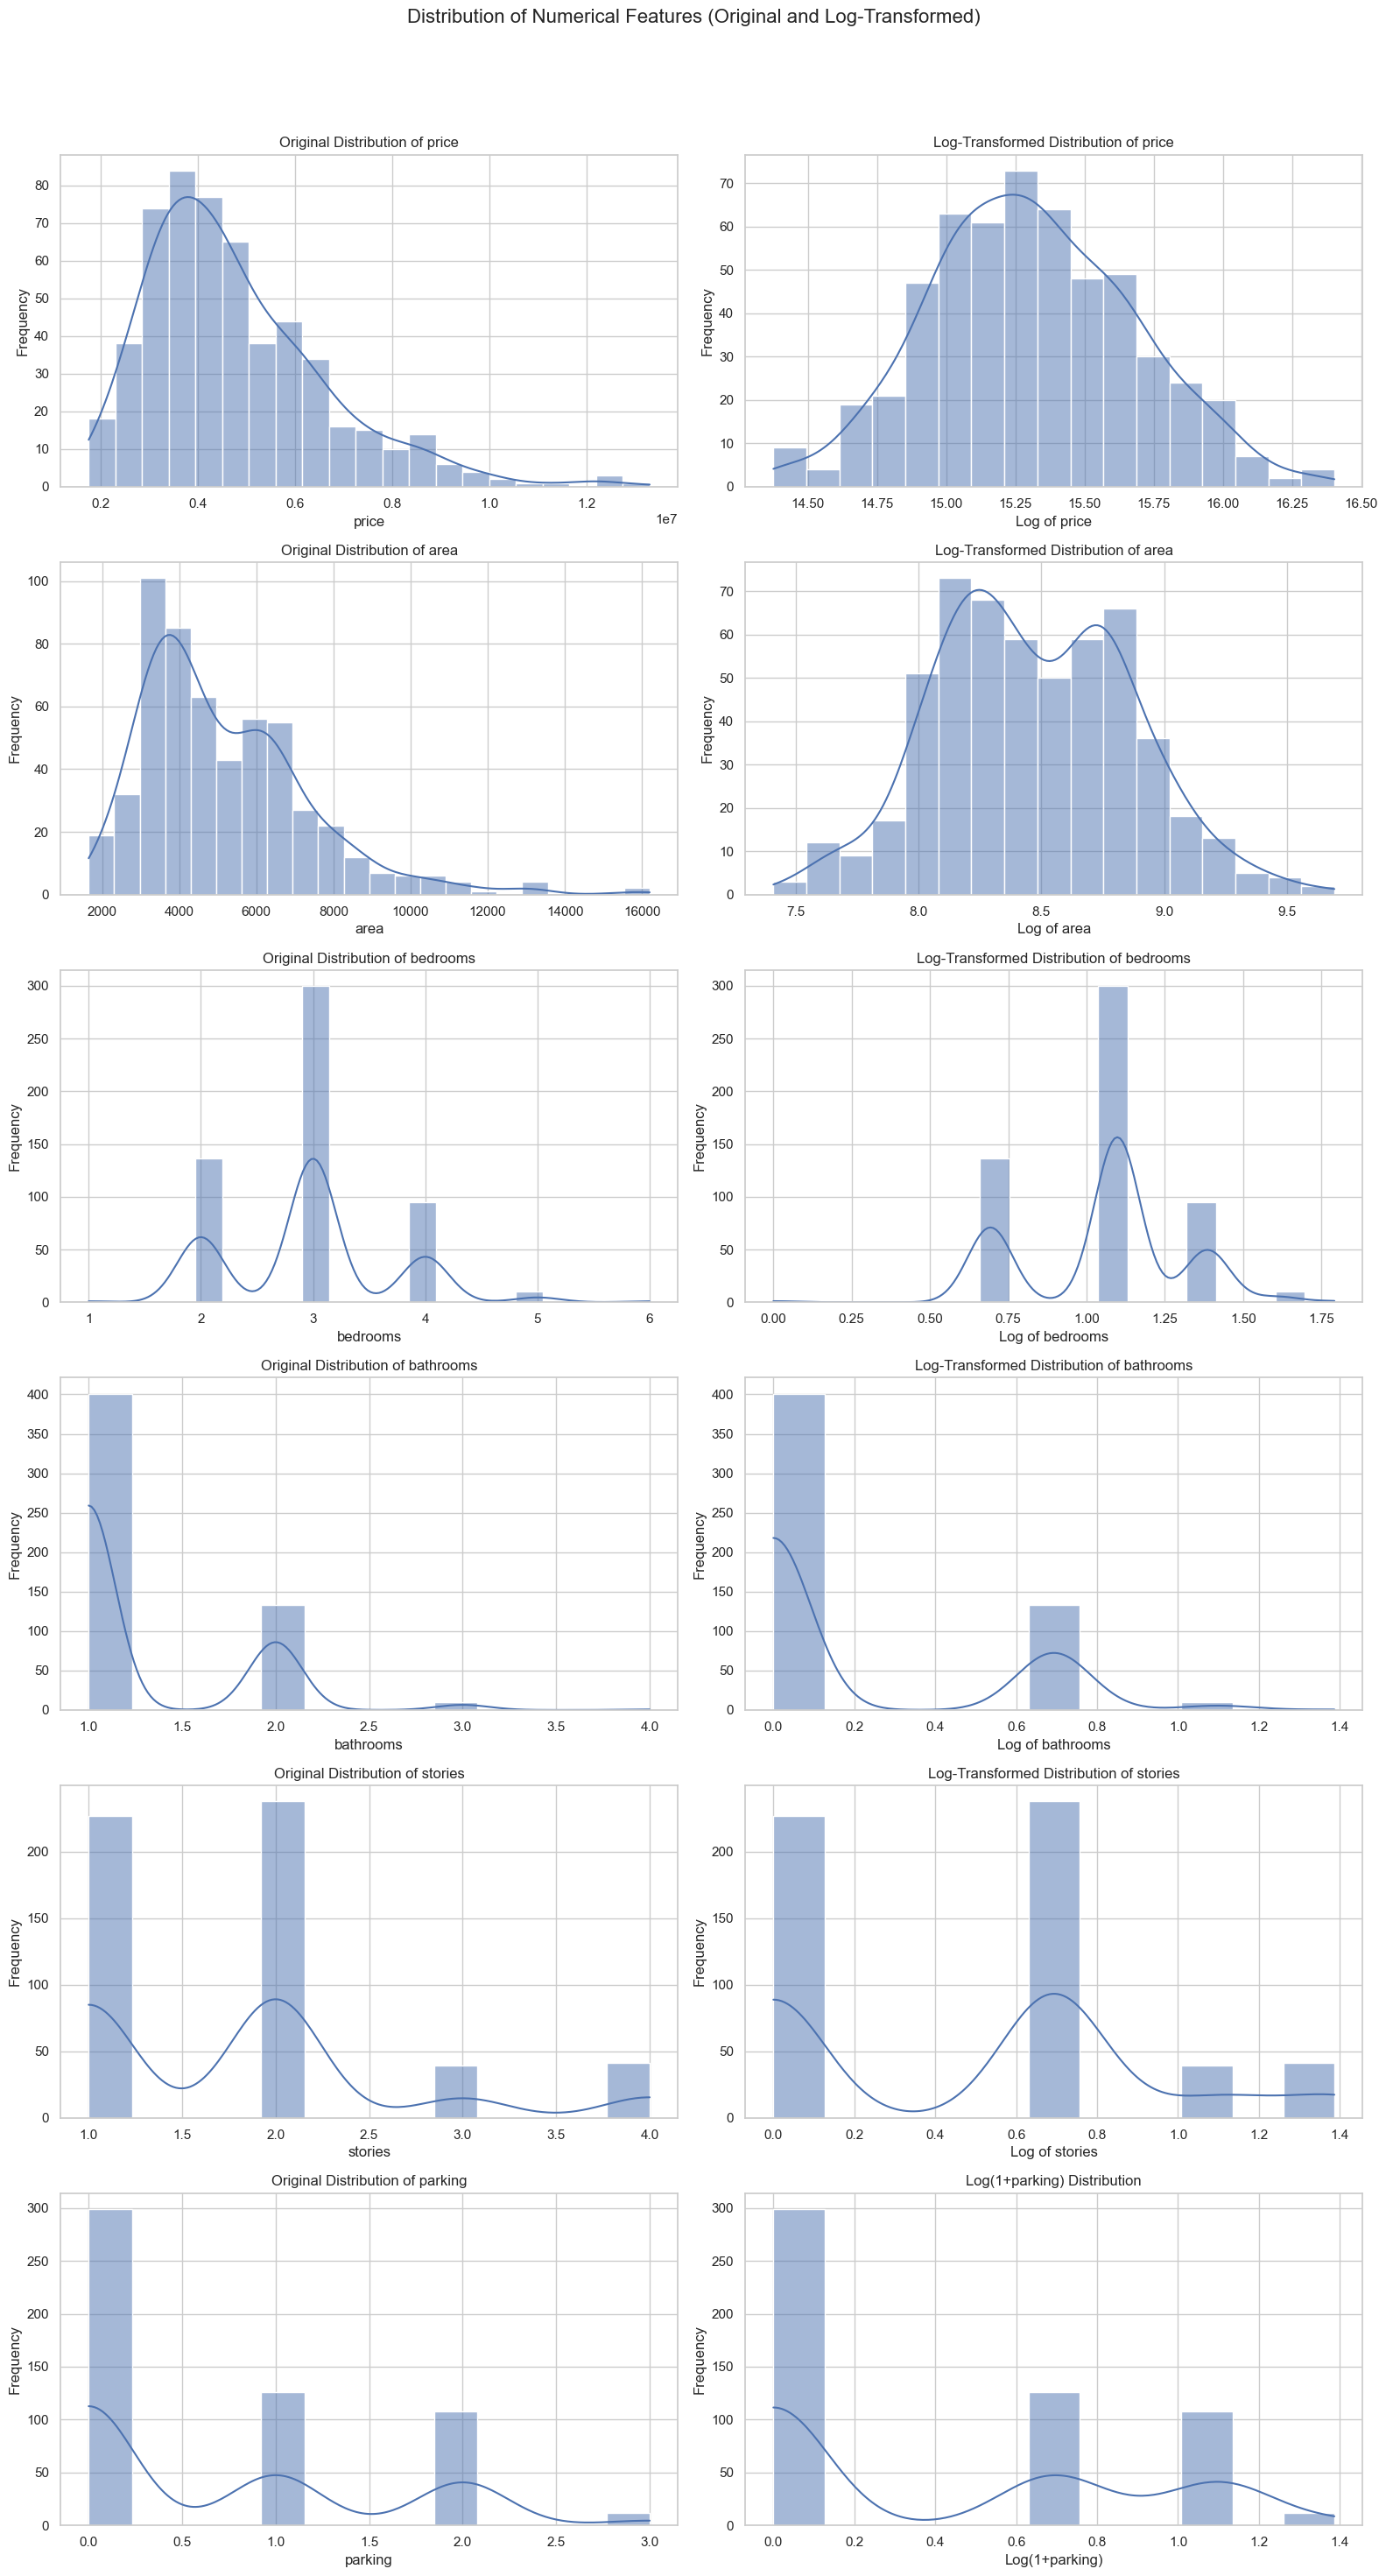

In [242]:
# Select original numerical features (excluding already log-transformed ones)
num_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.endswith('_log')]

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Two columns: one for original, one for log-transformed
n_rows = len(num_features)  # One row per original feature

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('Distribution of Numerical Features (Original and Log-Transformed)', fontsize=16)

# Plot each numerical feature with its log-transformed version
for i, col in enumerate(num_features):
    # Original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Original Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Log-transformed distribution (handle potential issues with non-positive values)
    if (df[col] <= 0).any():
        log_data = np.log1p(df[col])  # Use log1p to handle zero values
        axes[i, 1].set_title(f'Log(1+{col}) Distribution')
        axes[i, 1].set_xlabel(f'Log(1+{col})')
    else:
        log_data = np.log(df[col])
        axes[i, 1].set_title(f'Log-Transformed Distribution of {col}')
        axes[i, 1].set_xlabel(f'Log of {col}')
        
    sns.histplot(log_data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

- **Boxplots**:

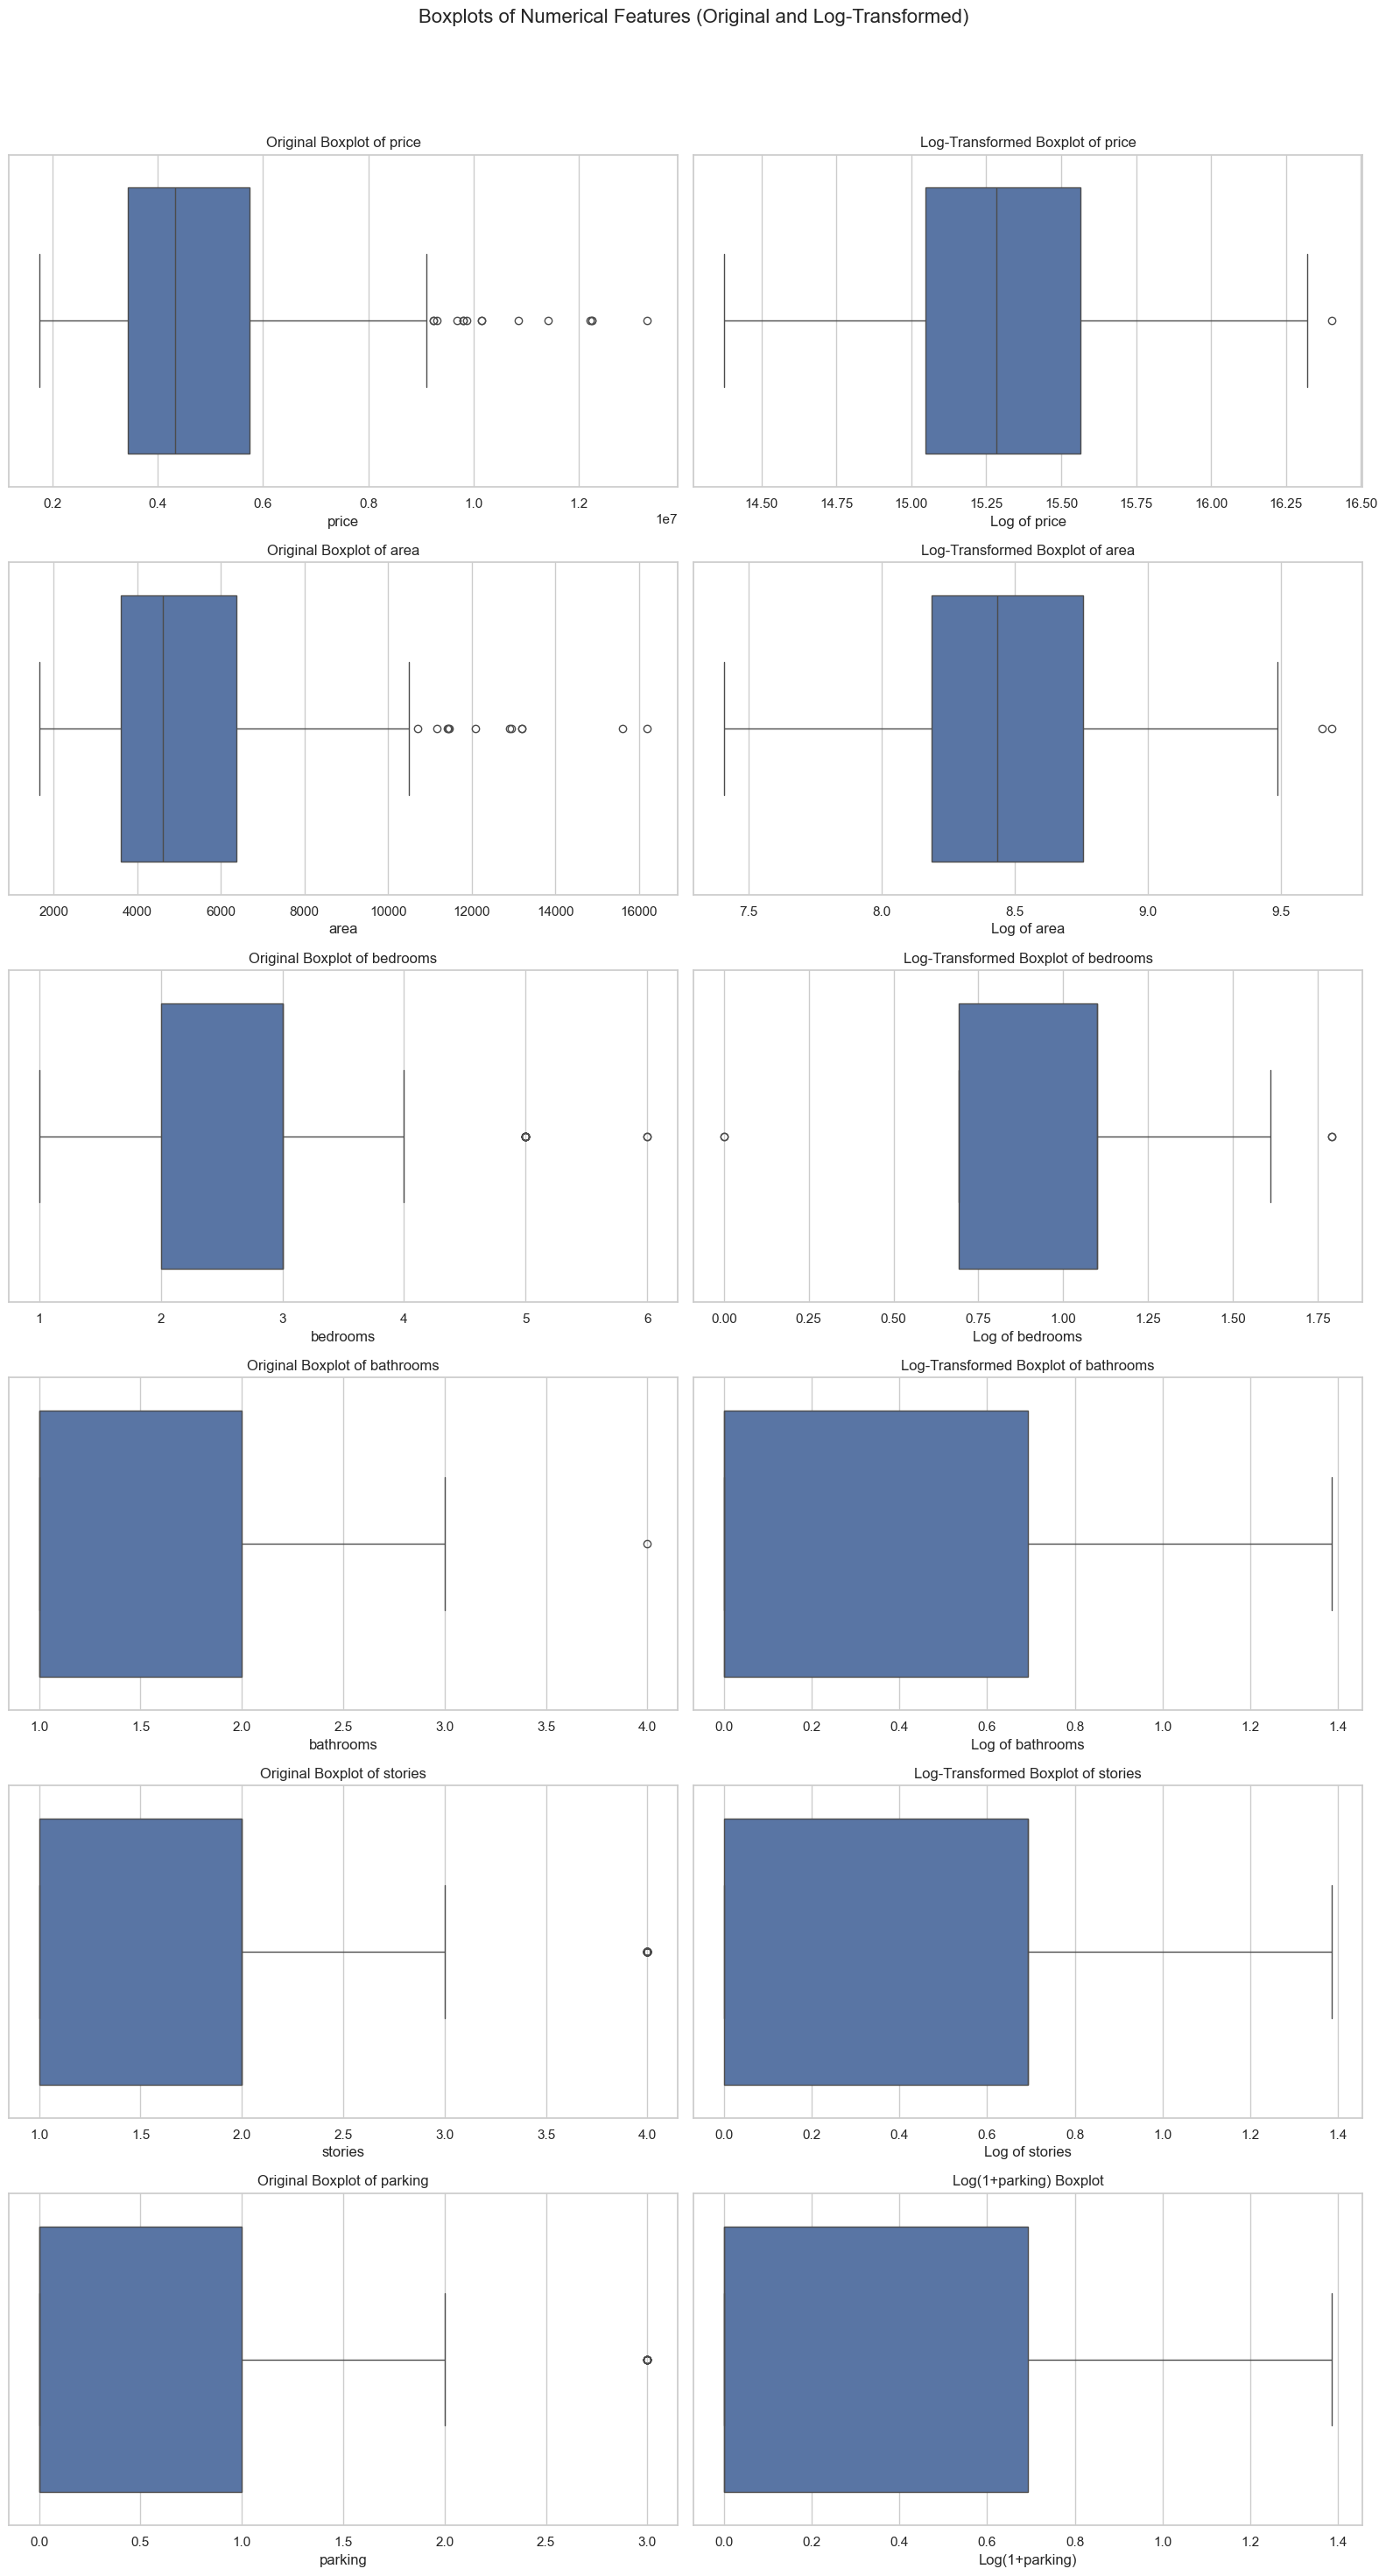

In [243]:
# Select original numerical features (excluding any pre-transformed ones)
num_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.endswith('_log')]

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Two columns: one for original, one for log-transformed
n_rows = len(num_features)  # One row per feature

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('Boxplots of Numerical Features (Original and Log-Transformed)', fontsize=16)

# Plot each numerical feature with its log-transformed version
for i, col in enumerate(num_features):
    # Original distribution boxplot
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Original Boxplot of {col}')
    axes[i, 0].set_xlabel(col)

    # Log-transformed distribution boxplot (handle non-positive values)
    if (df[col] <= 0).any():
        log_data = np.log1p(df[col])  # Use log1p to handle zero values
        axes[i, 1].set_title(f'Log(1+{col}) Boxplot')
        axes[i, 1].set_xlabel(f'Log(1+{col})')
    else:
        log_data = np.log(df[col])
        axes[i, 1].set_title(f'Log-Transformed Boxplot of {col}')
        axes[i, 1].set_xlabel(f'Log of {col}')
    
    sns.boxplot(x=log_data, ax=axes[i, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()

   - **Categorical Features**:
     - **Bar Plots**

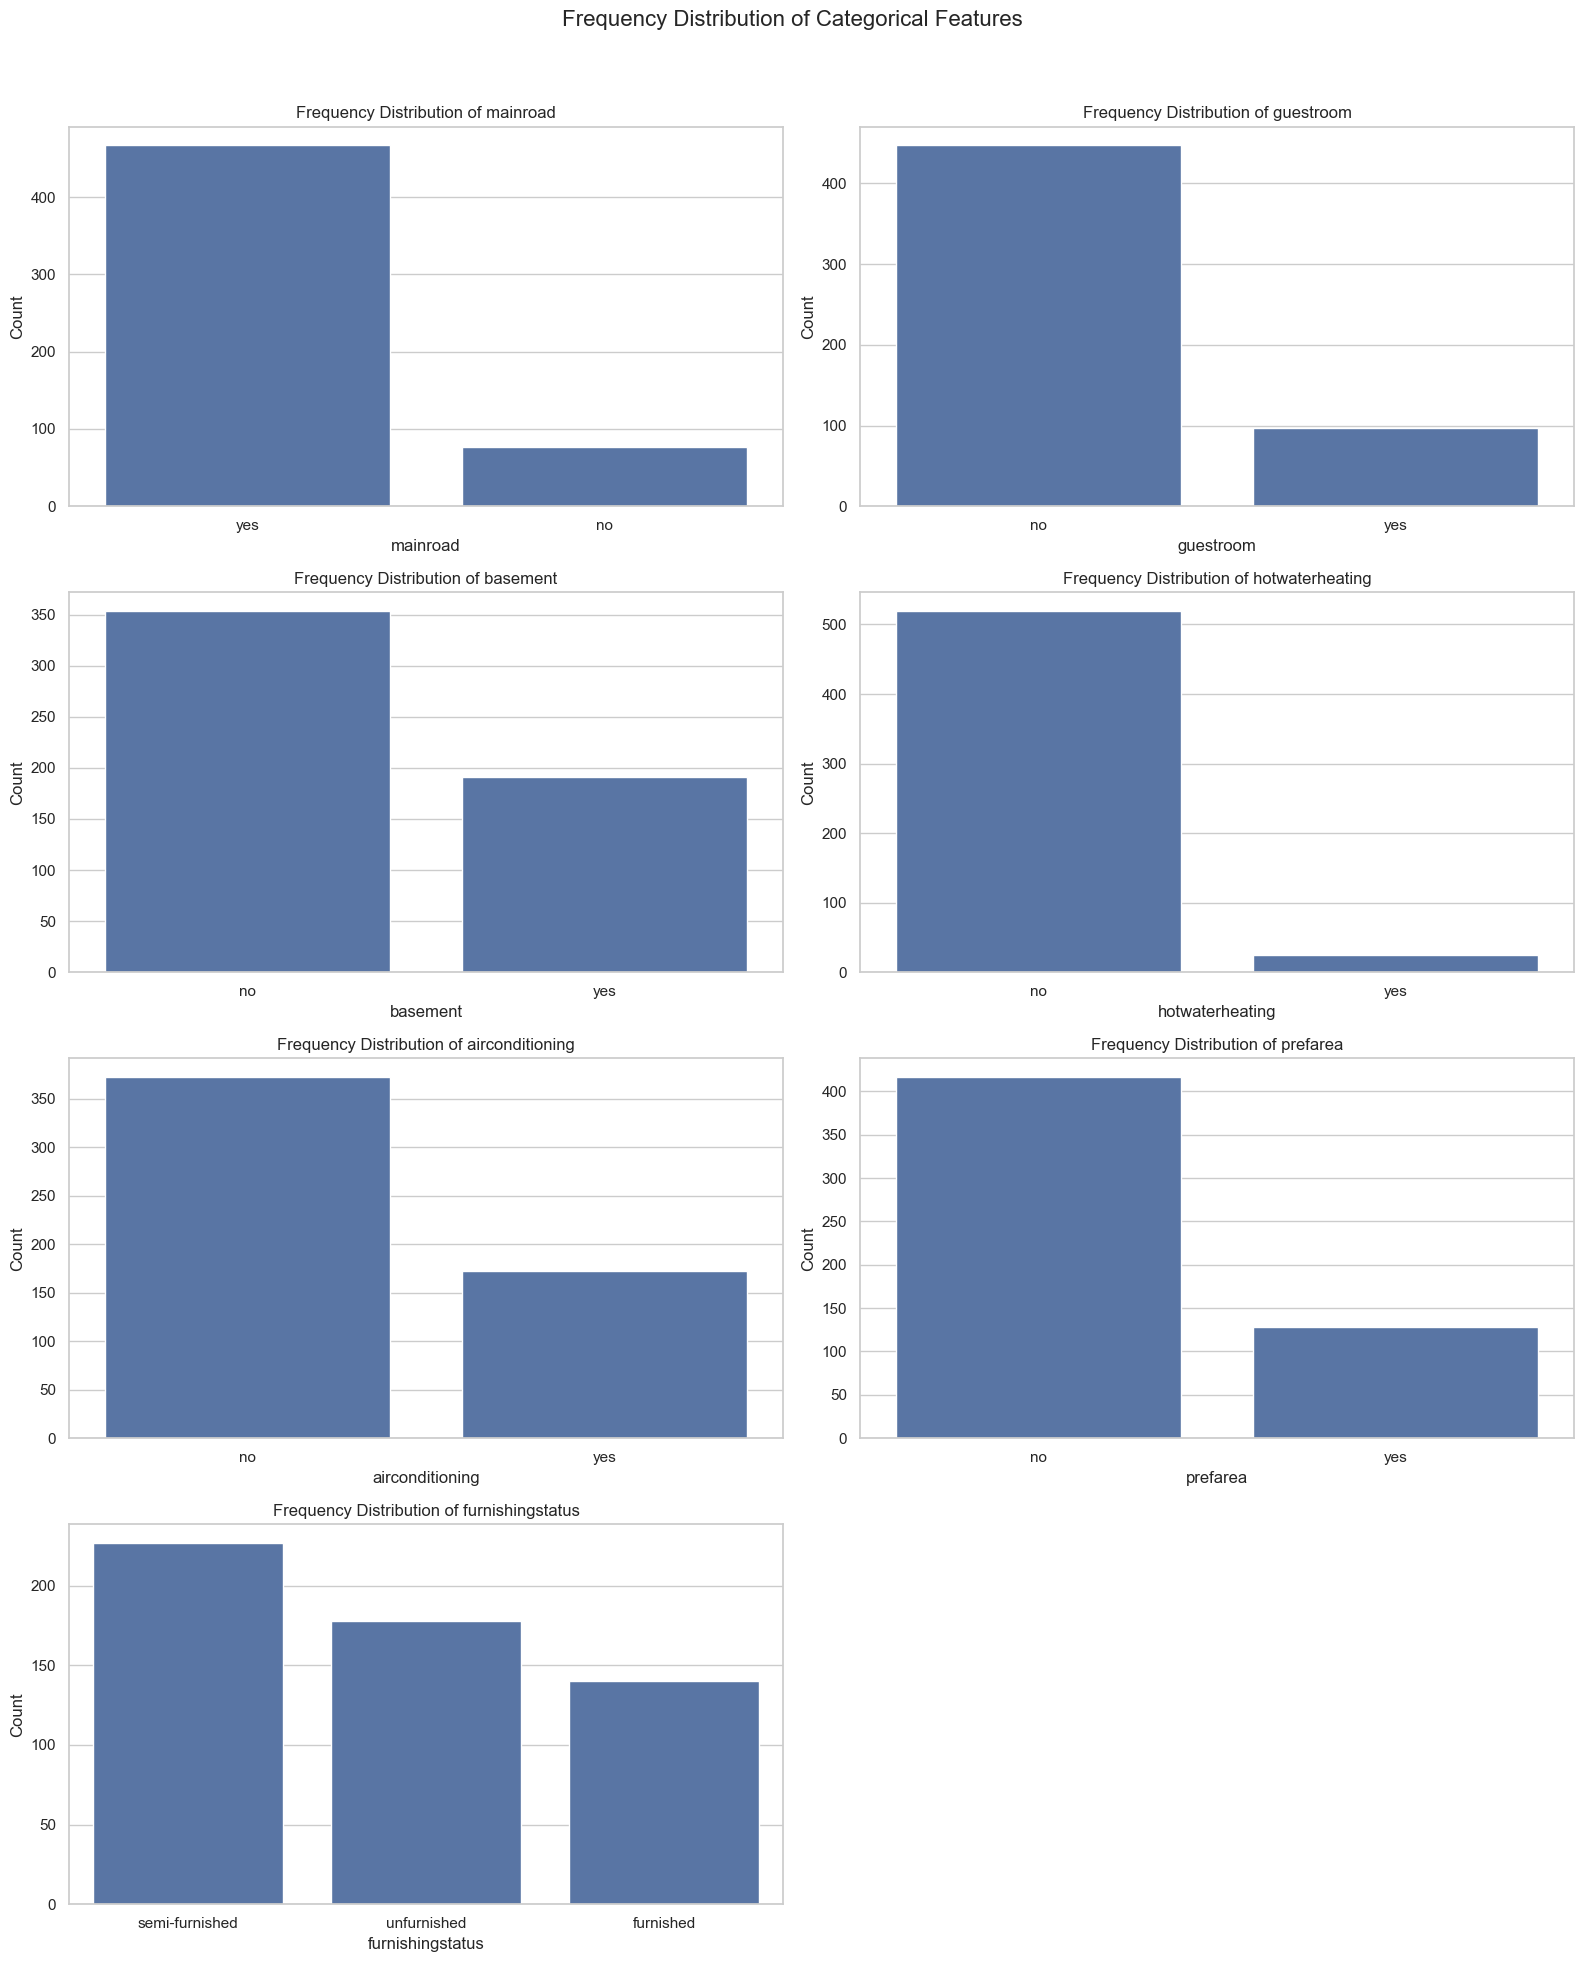

In [244]:
# Select categorical features
cat_features = df.select_dtypes(include=['object']).columns

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Number of columns
n_rows = (len(cat_features) + n_cols - 1) // n_cols  # Calculate required rows based on number of features

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('Frequency Distribution of Categorical Features', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical feature in a separate subplot as vertical bar charts
for i, col in enumerate(cat_features):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Frequency Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any empty subplots if there are fewer plots than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit main title
plt.show()

### 3. Bivariate Analysis
- **Target vs. Numerical Features**:
  - **Correlation Analysis**

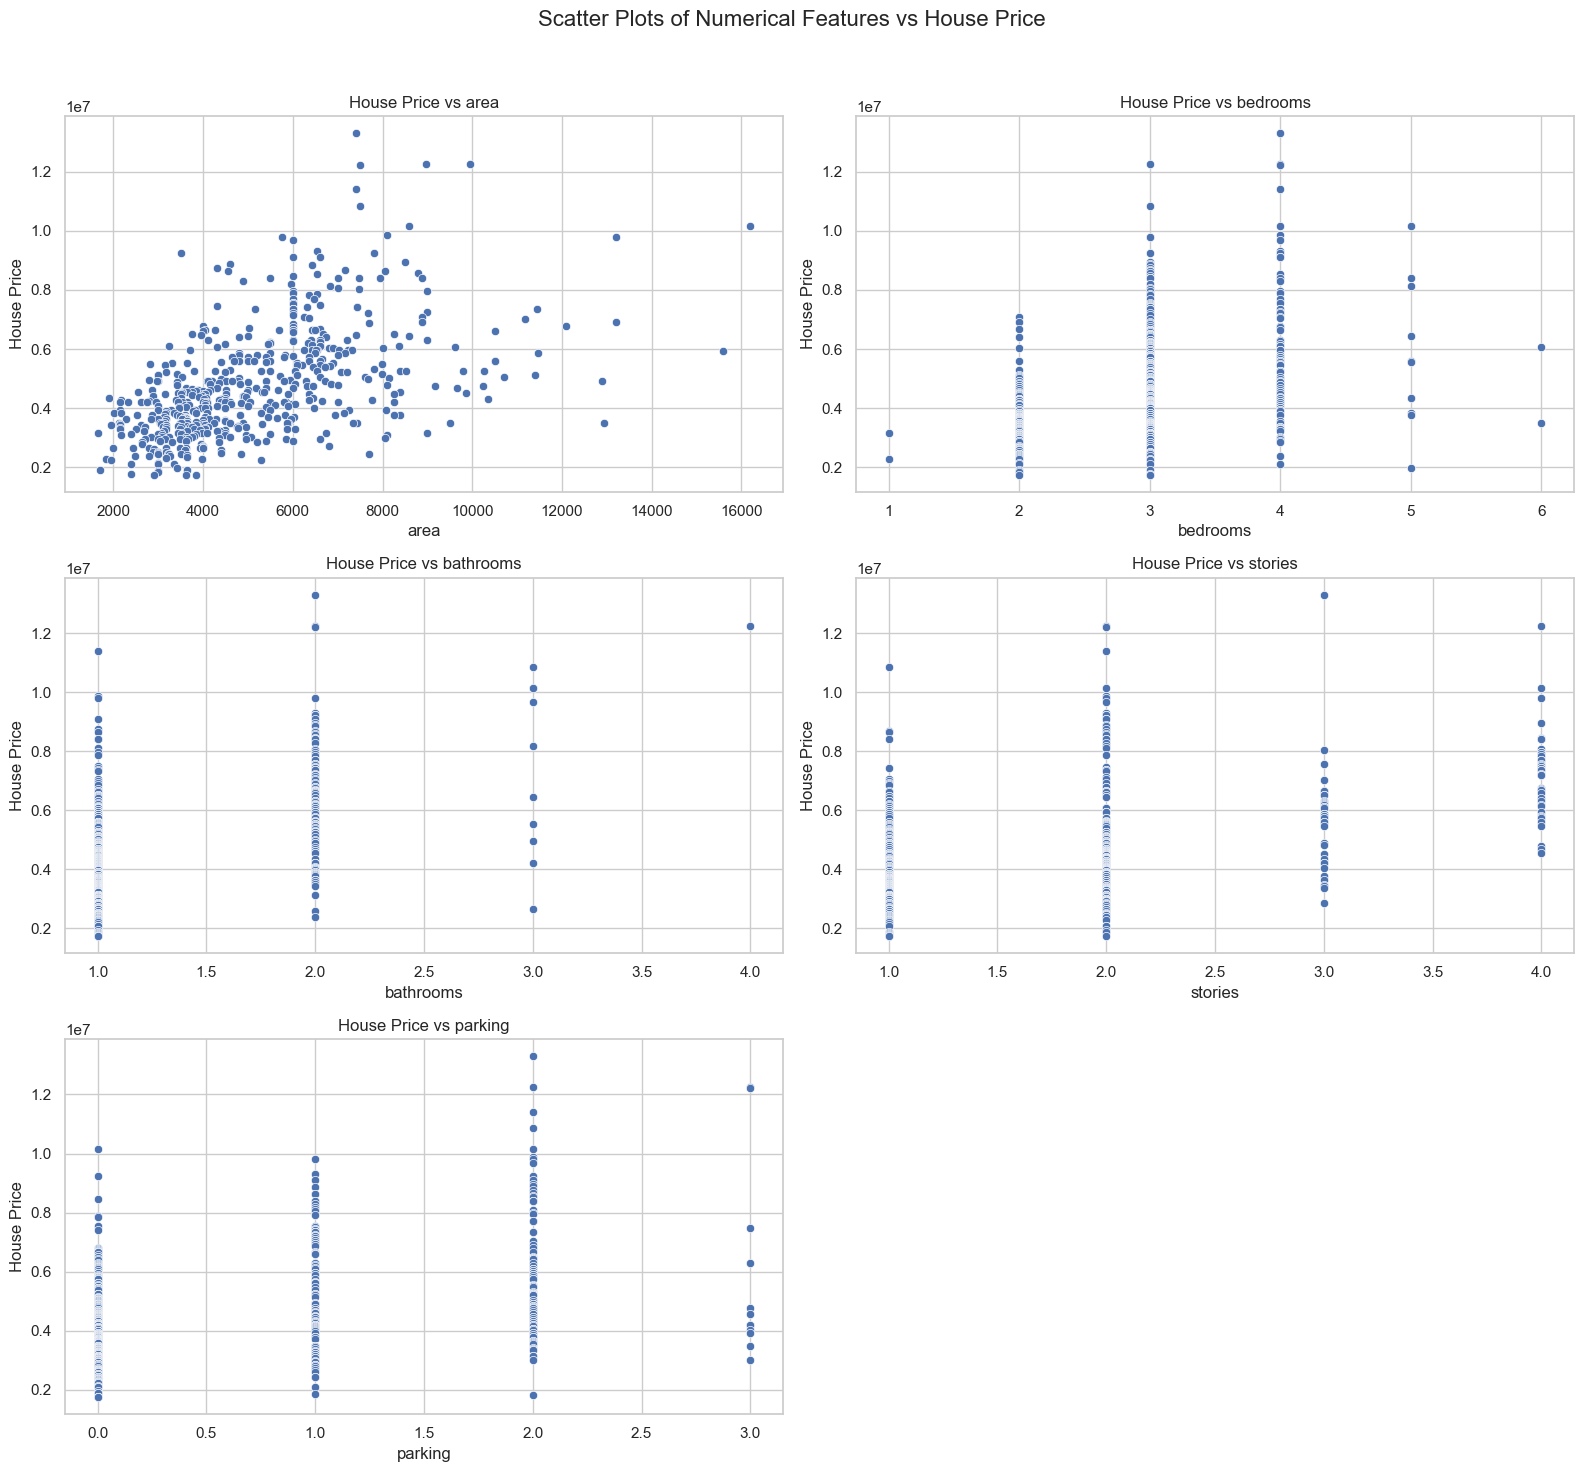

In [245]:
# Select original numerical features (excluding already log-transformed ones)
num_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.endswith('_log') and col != 'price']

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Number of columns
n_rows = (len(num_features) + n_cols - 1) // n_cols  # Calculate required rows based on number of features

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('Scatter Plots of Numerical Features vs House Price', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature against house price in a separate subplot
for i, col in enumerate(num_features):
    sns.scatterplot(x=df[col], y=df['price'], ax=axes[i])
    axes[i].set_title(f'House Price vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('House Price')

# Remove any empty subplots if there are fewer plots than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit main title
plt.show()

- **Target vs. Numerical Features**:
  - **Correlation Analysis**

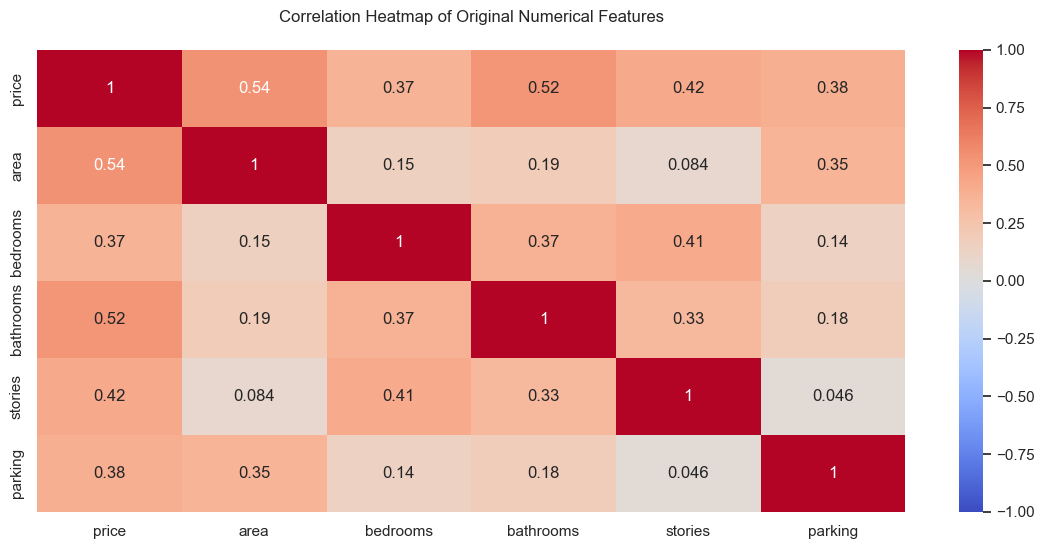

In [246]:
# Select only the original numerical features, excluding log-transformed columns
original_num_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.endswith('_log')]

# Compute the correlation matrix for the selected features
correlation_matrix = df[original_num_features].corr()

# Create a heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Original Numerical Features', pad=20)
plt.show()

   - **Target vs. Categorical Features**:
     - **Boxplots**:
       - Plot house price distributions across different categories within each categorical feature.
       - Identify significant differences in median prices among categories, which might suggest relationships or groupings that could enhance model performance.

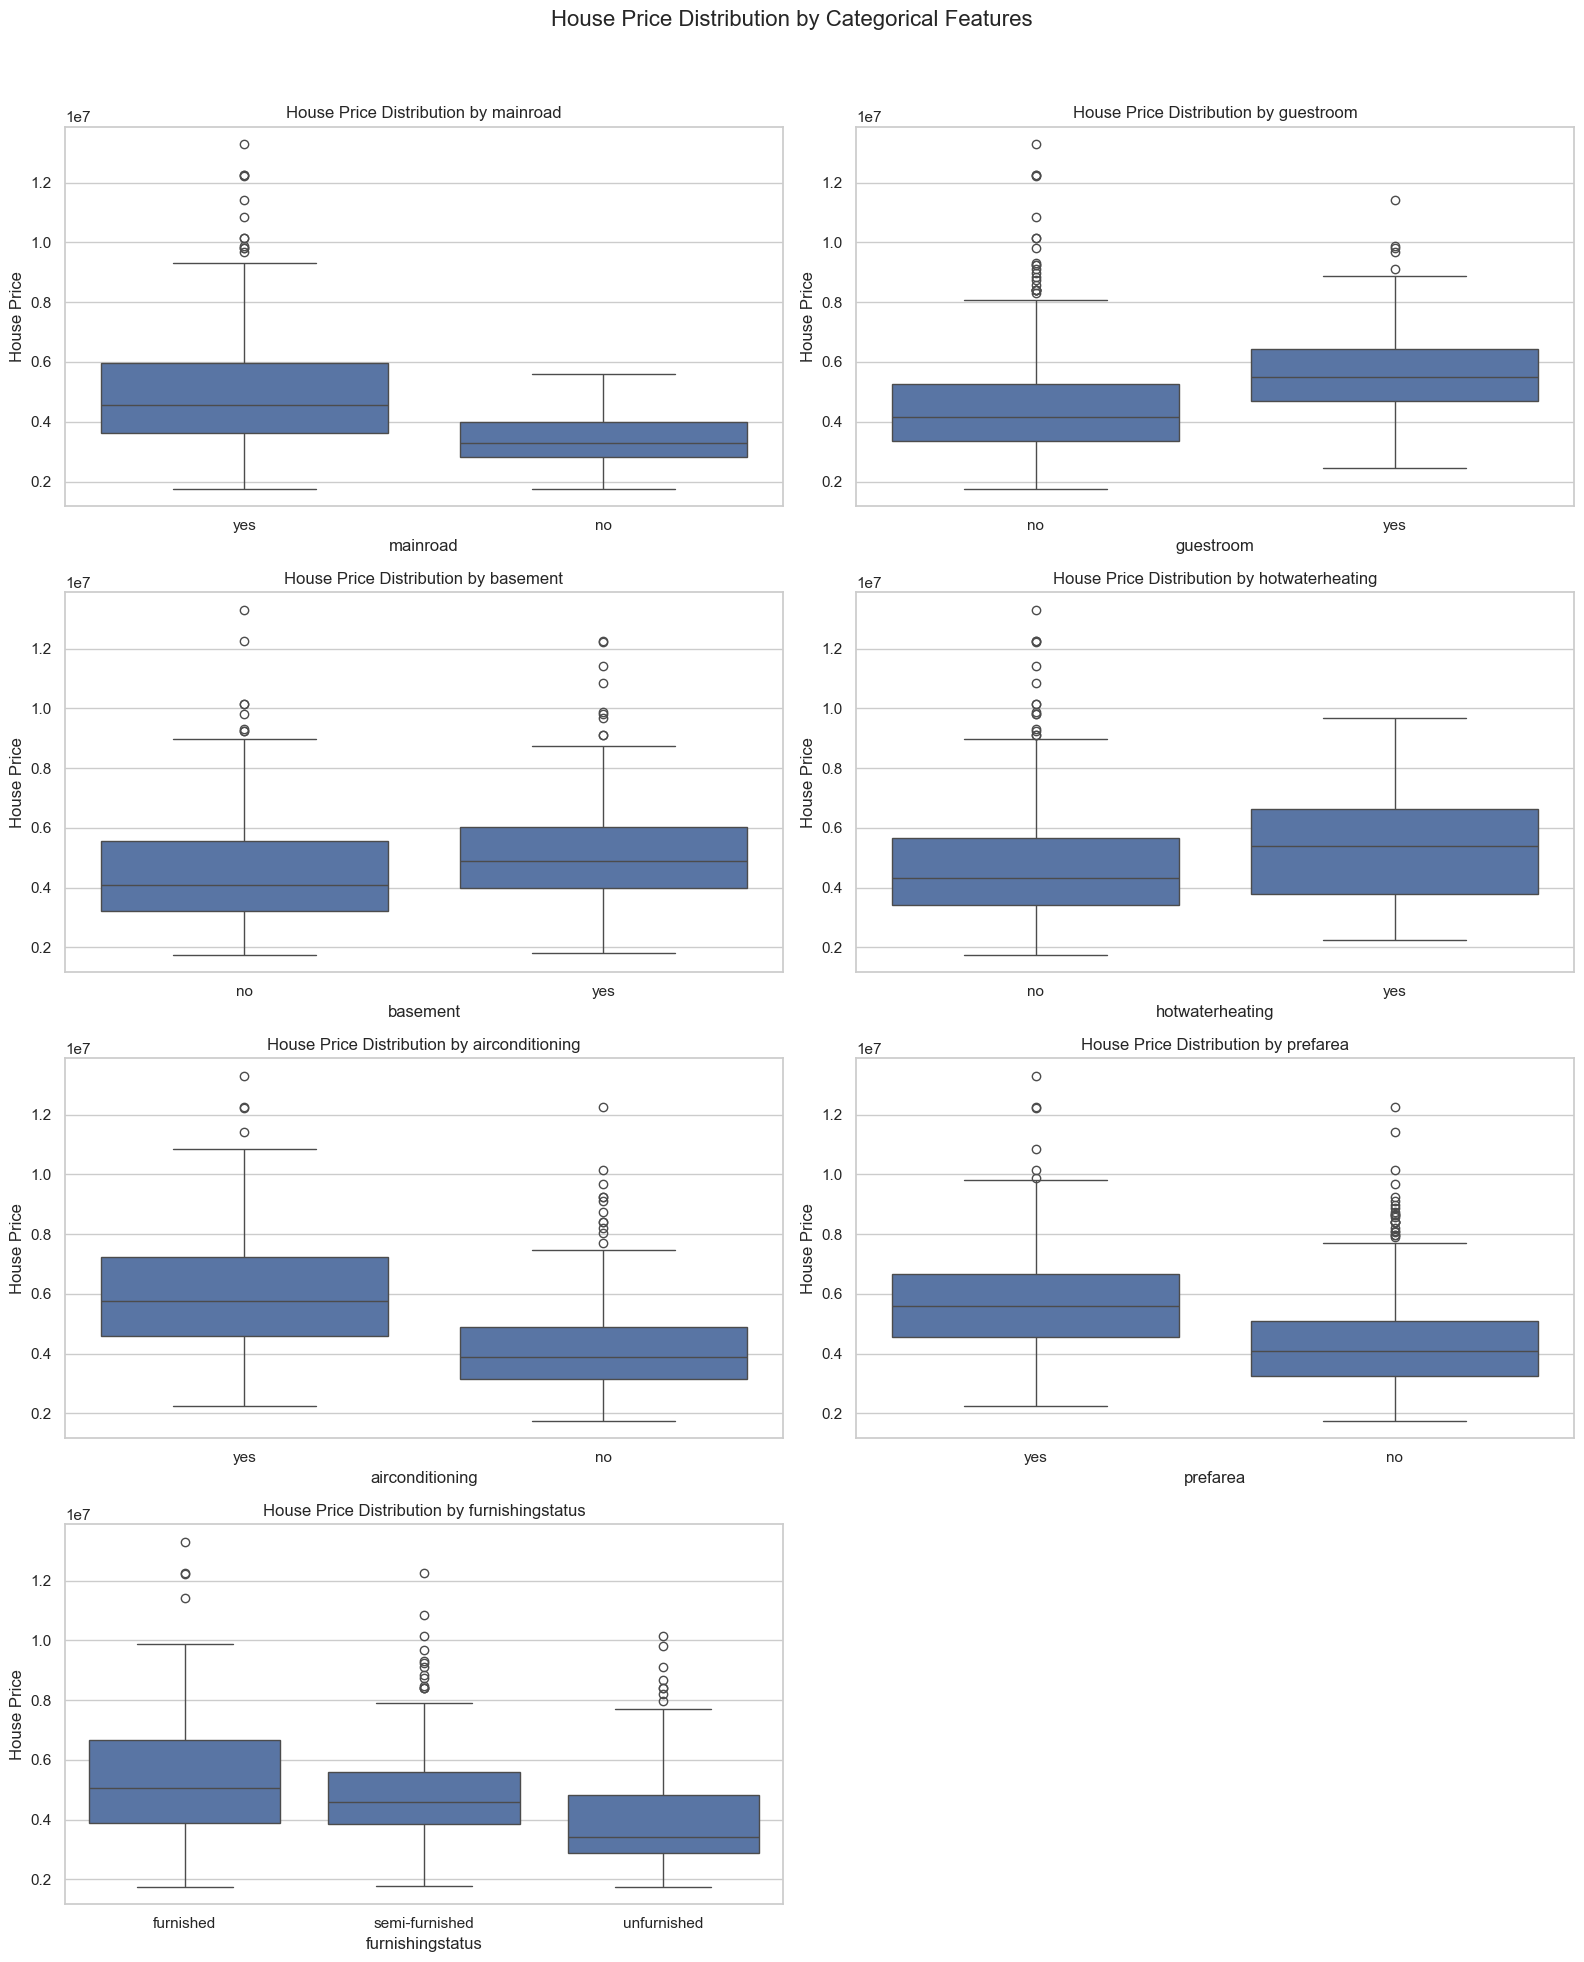

In [247]:
# Select categorical features
cat_features = df.select_dtypes(include=['object']).columns

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Number of columns
n_rows = (len(cat_features) + n_cols - 1) // n_cols  # Calculate required rows based on number of features

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('House Price Distribution by Categorical Features', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical feature in a separate subplot
for i, col in enumerate(cat_features):
    sns.boxplot(x=df[col], y=df['price'], ax=axes[i])
    axes[i].set_title(f'House Price Distribution by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('House Price')

# Remove any empty subplots if there are fewer plots than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit main title
plt.show()

- **Mean/Median Price Comparison**:
    - Calculate and visualize the average house price for each category in categorical features, comparing them directly.
    - Highlight any categories where house price varies notably from the overall mean.

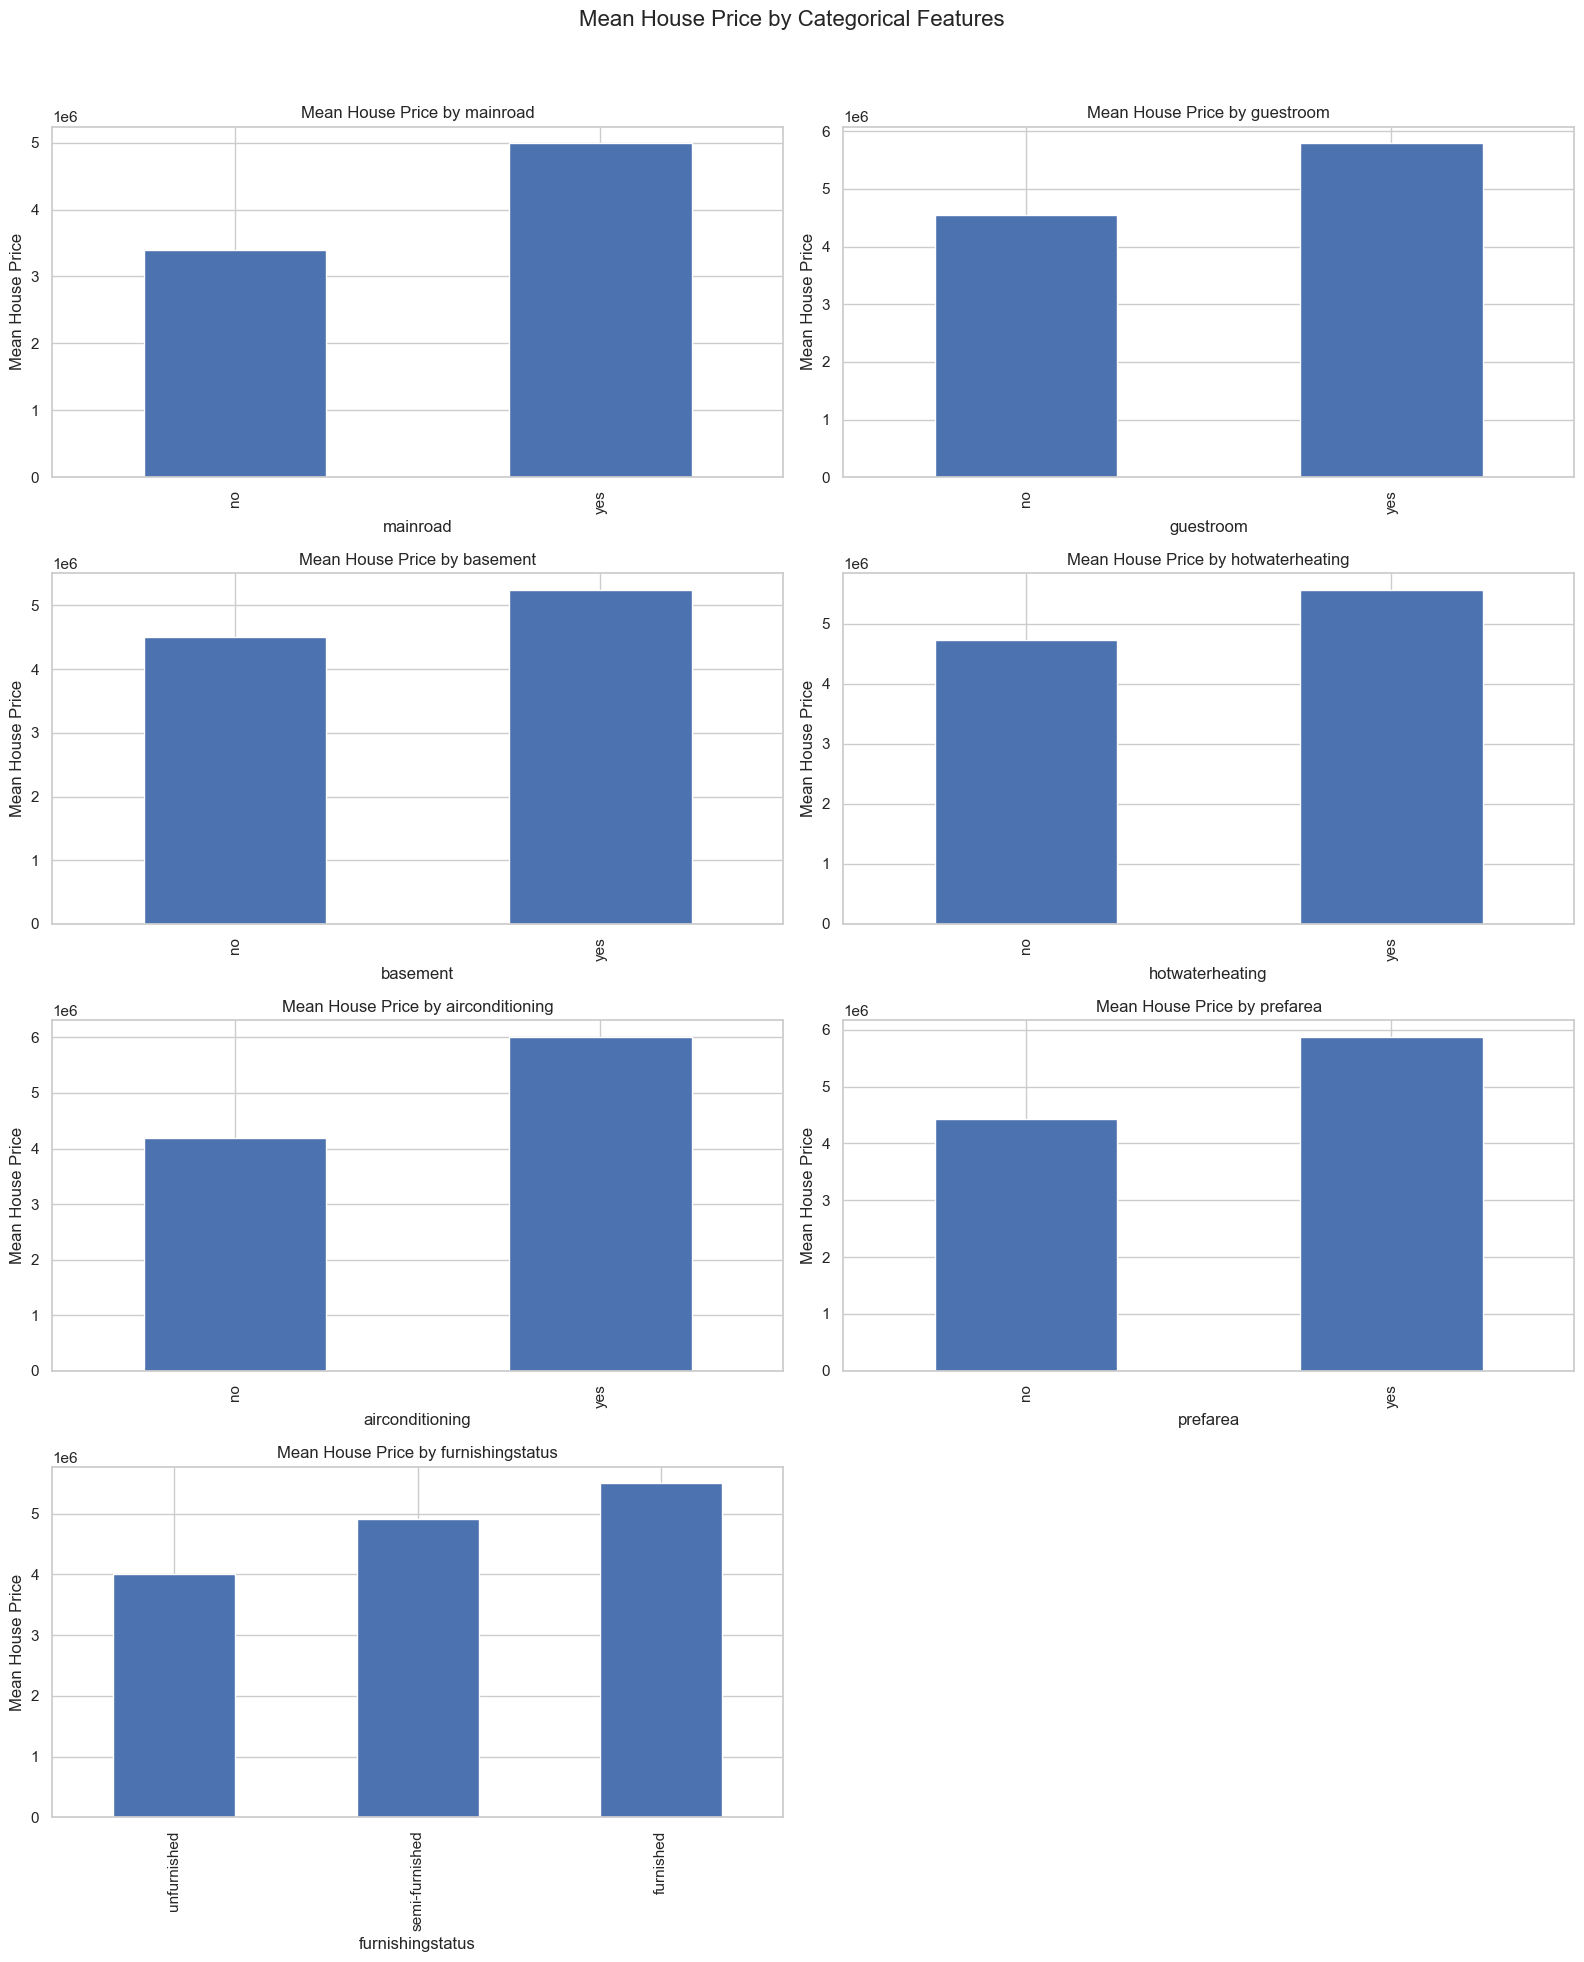

In [292]:
# Select categorical features
cat_features = df.select_dtypes(include=['object']).columns

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Number of columns
n_rows = (len(cat_features) + n_cols - 1) // n_cols  # Calculate required rows based on number of features

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('Mean House Price by Categorical Features', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical feature in a separate subplot
for i, col in enumerate(cat_features):
    mean_price_by_cat = df.groupby(col)['price'].mean().sort_values()
    mean_price_by_cat.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Mean House Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Mean House Price')

# Remove any empty subplots if there are fewer plots than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit main title
plt.show()

### 4. Multivariate Analysis
   - **Interaction Between Numerical Features**:
     - Use scatter plots or pair plots to visualize interactions between key numerical features and house price.
     - Use pair plots for smaller datasets to see relationships between features simultaneously.

In [249]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'House Price_log'],
      dtype='object')

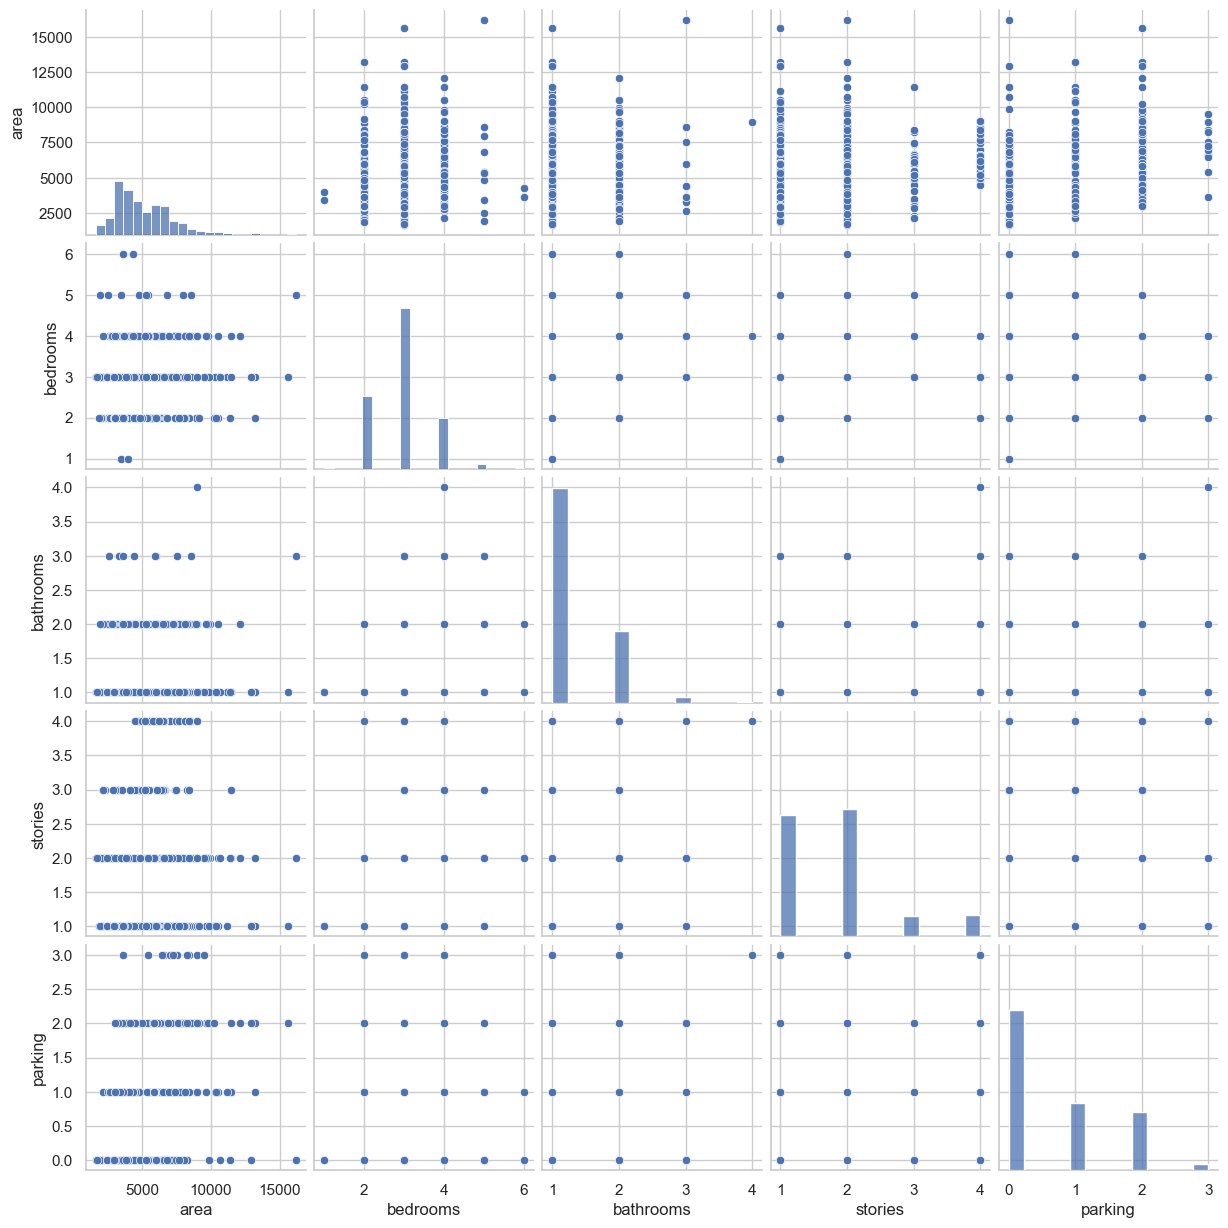

In [250]:
# Pair plot for numerical features to visualize interactions
sns.pairplot(df[num_features])
plt.show()

  - **Interaction Between Categorical and Numerical Features**:
     - Compare the distribution of numerical features across categories, using grouped boxplots or violin plots.
     - Identify if certain combinations (e.g., specific categories with certain ranges of numerical features) appear to impact the house price.

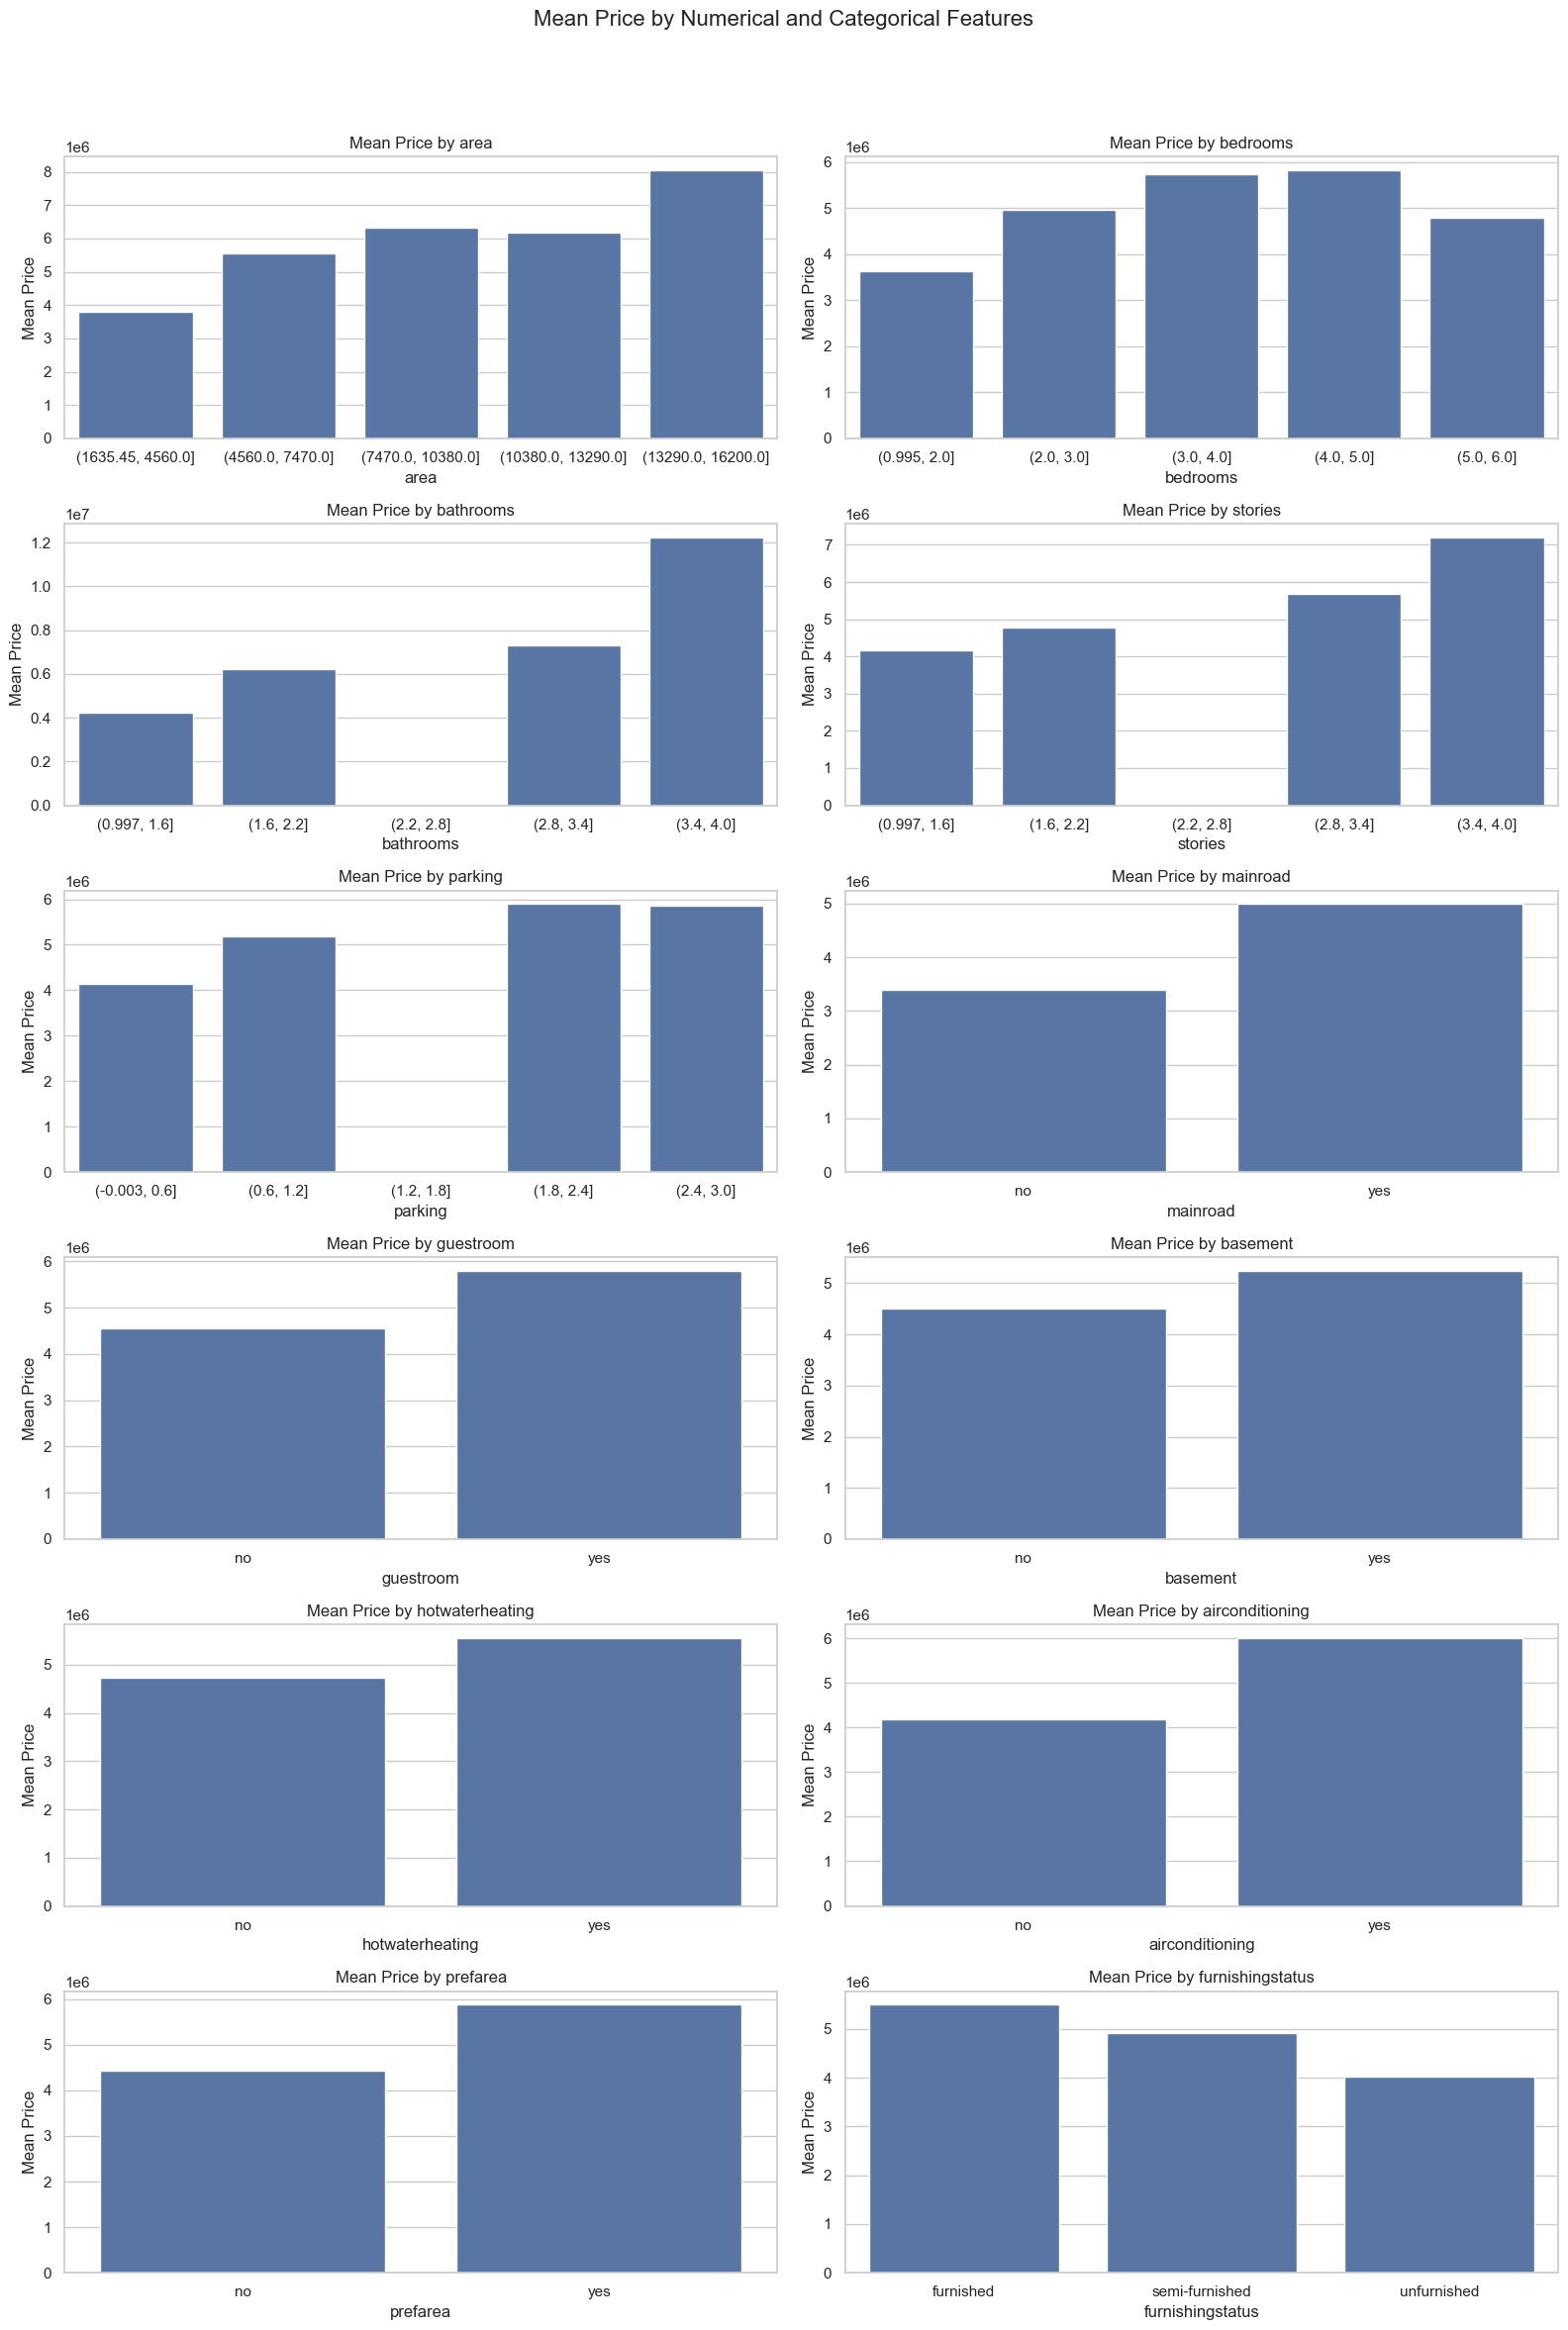

In [259]:
# Define the columns
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Number of columns for the grid
n_rows = (len(num_features) + len(cat_features) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
fig.suptitle('Mean Price by Numerical and Categorical Features', fontsize=16)
axes = axes.flatten()

# Plot bar charts for numerical features (grouped by bins for bar chart)
for i, col in enumerate(num_features):
    df[col+'_bin'] = pd.cut(df[col], bins=5)  # Bin the numerical feature for bar chart
    mean_price_by_bin = df.groupby(col+'_bin')['price'].mean()
    sns.barplot(x=mean_price_by_bin.index.astype(str), y=mean_price_by_bin.values, ax=axes[i])
    axes[i].set_title(f'Mean Price by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Mean Price')

# Plot bar charts for categorical features
for j, col in enumerate(cat_features, start=len(num_features)):
    mean_price_by_cat = df.groupby(col)['price'].mean()
    sns.barplot(x=mean_price_by_cat.index, y=mean_price_by_cat.values, ax=axes[j])
    axes[j].set_title(f'Mean Price by {col}')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel('Mean Price')

# Remove any empty subplots if there are fewer plots than grid spaces
for k in range(j + 1, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

In [258]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [262]:
# Define the columns
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Choose a hue variable for categorical analysis, such as 'furnishingstatus'
hue_feature = 'furnishingstatus'

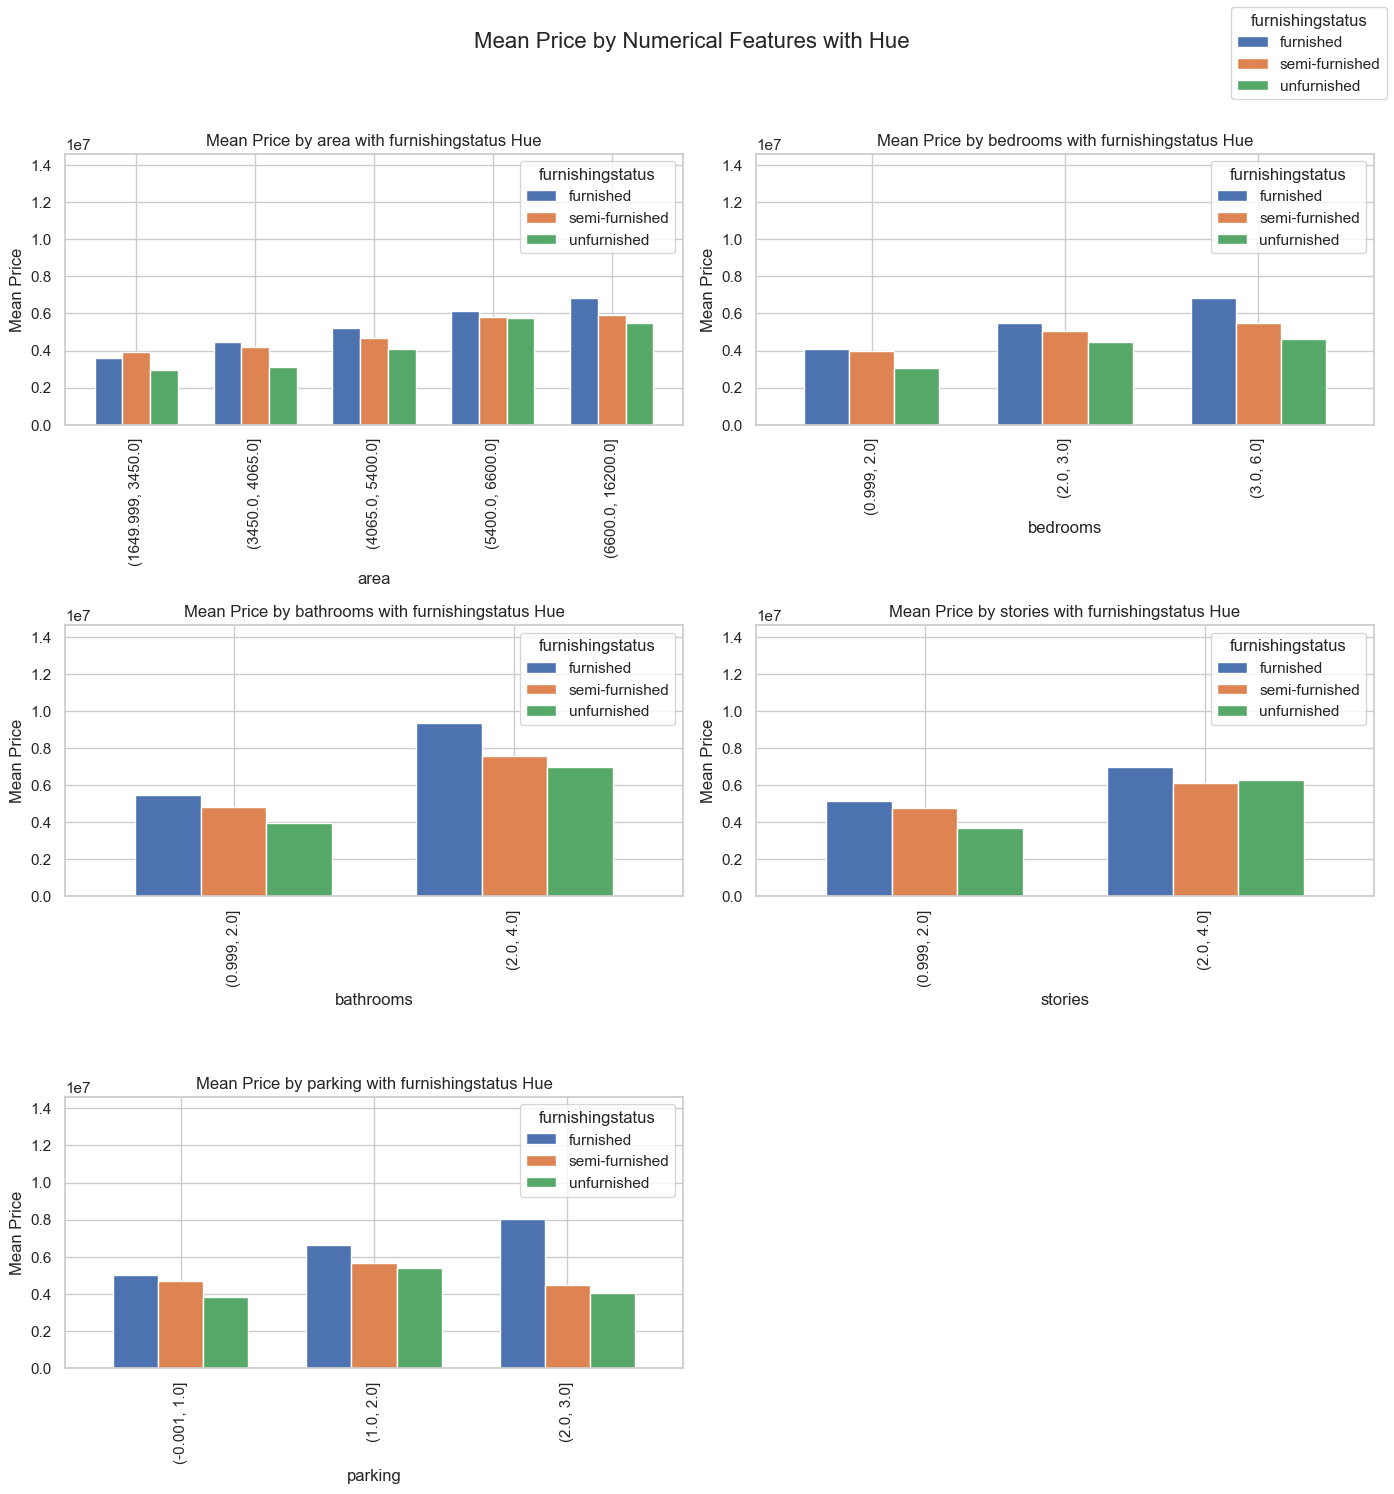

In [269]:
# Define the number of rows and columns for the numerical feature grid
n_cols_num = 2  # Number of columns for the grid
n_rows_num = (len(num_features) + n_cols_num - 1) // n_cols_num  # Calculate required rows

# Create subplots for numerical features
fig_num, axes_num = plt.subplots(n_rows_num, n_cols_num, figsize=(14, n_rows_num * 5))
fig_num.suptitle('Mean Price by Numerical Features with Hue', fontsize=16)
axes_num = axes_num.flatten()

# Set a common y-axis limit for better comparison
y_max = df['price'].max() * 1.1

# Plot bar charts for numerical features (grouped by bins for bar chart)
for i, col in enumerate(num_features):
    # Use quantile-based binning for more balanced groups
    df[col + '_bin'] = pd.qcut(df[col], q=5, duplicates='drop')
    mean_price_by_bin = df.groupby([col + '_bin', hue_feature])['price'].mean().unstack()
    mean_price_by_bin.plot(kind='bar', ax=axes_num[i], width=0.7)
    axes_num[i].set_title(f'Mean Price by {col} with {hue_feature} Hue')
    axes_num[i].set_xlabel(col)
    axes_num[i].set_ylabel('Mean Price')
    axes_num[i].set_ylim(0, y_max)

# Remove any empty subplots if there are fewer numerical features than grid spaces
for k in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[k])

# Only display the legend once
handles, labels = axes_num[0].get_legend_handles_labels()
fig_num.legend(handles, labels, loc='upper right', title=hue_feature)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

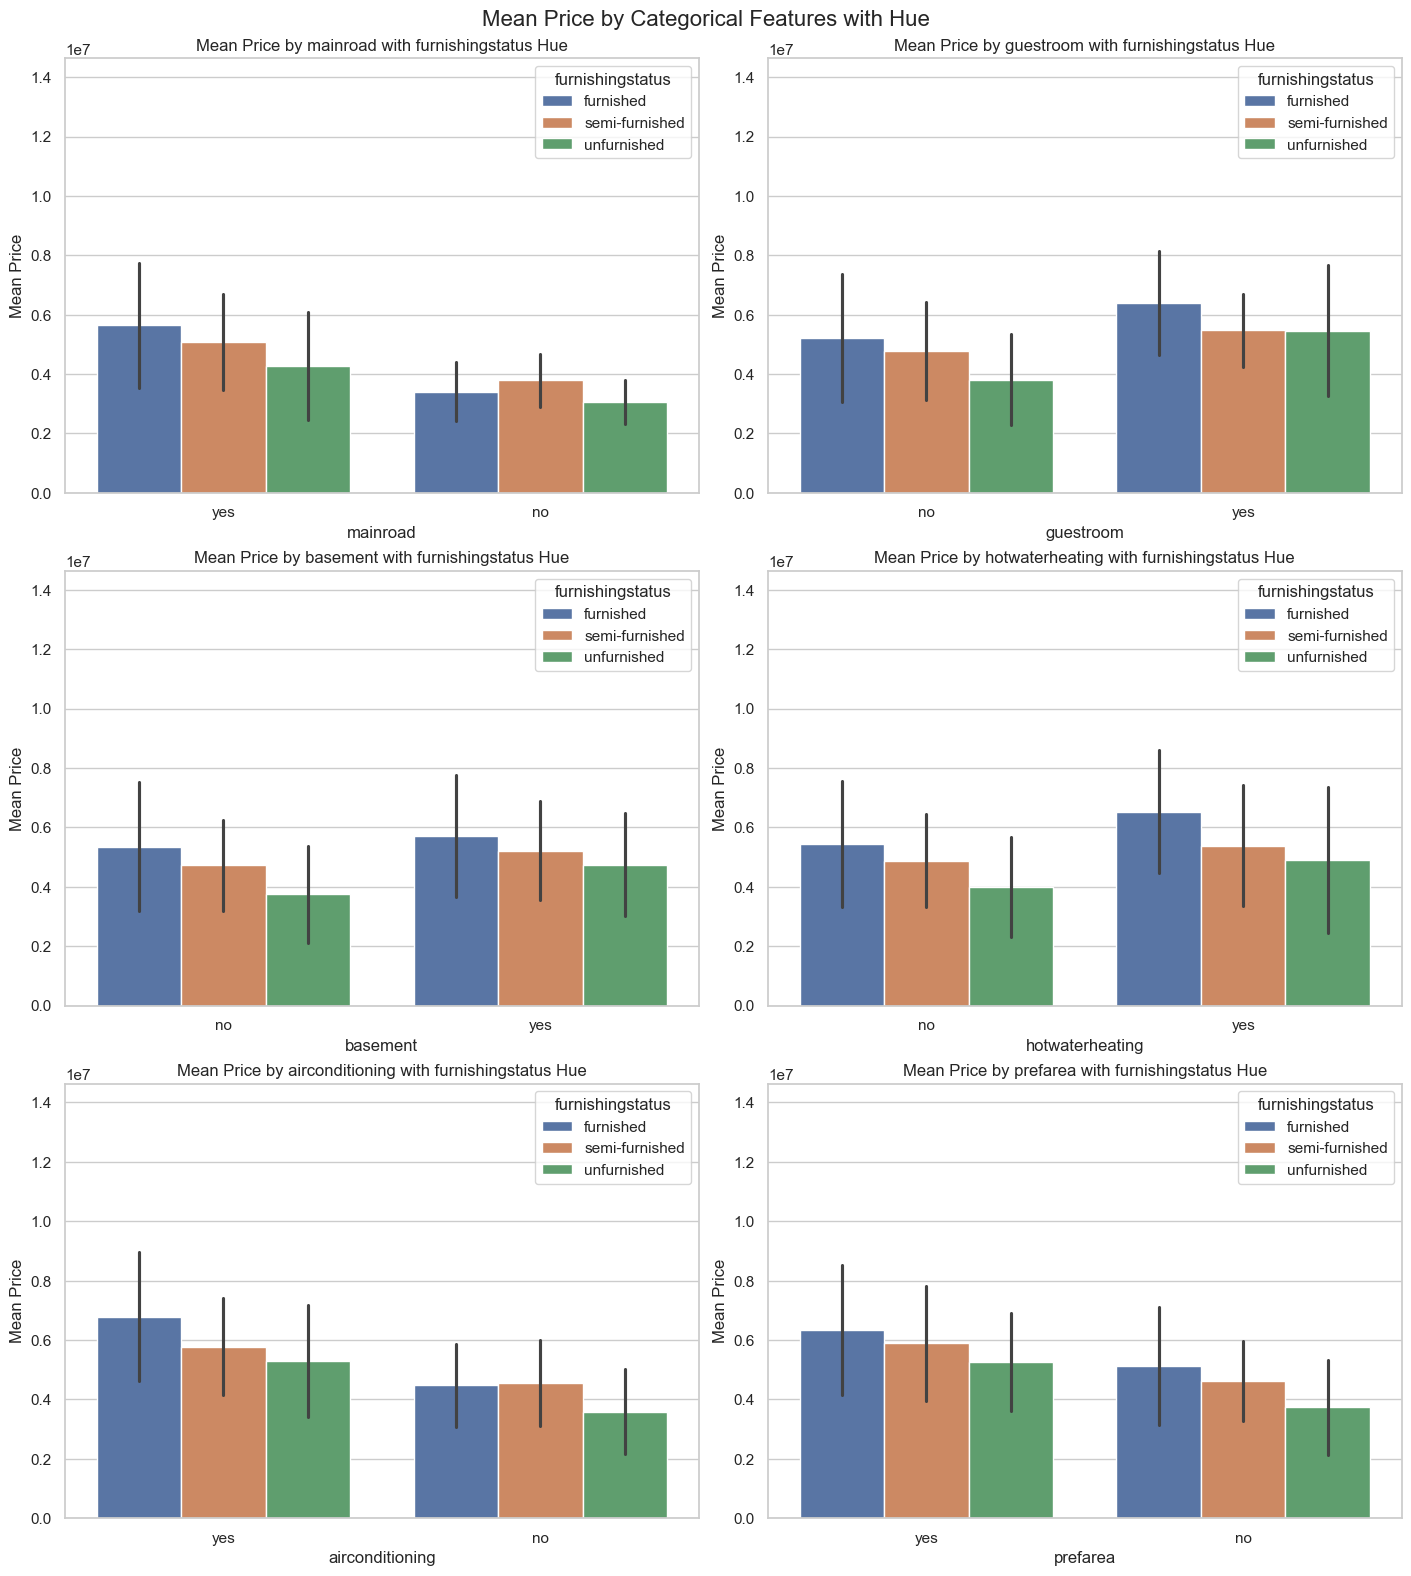

In [283]:
# Define the number of rows and columns for the categorical feature grid
n_cols_cat = 2  # Number of columns for the grid
n_rows_cat = (len(cat_features) + n_cols_cat - 1) // n_cols_cat  # Calculate required rows

# Create subplots for categorical features
fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(14, n_rows_cat * 5), constrained_layout=True)
fig_cat.suptitle('Mean Price by Categorical Features with Hue', fontsize=16)
axes_cat = axes_cat.flatten()

# Set a consistent y-axis limit for comparison
y_max = df['price'].max() * 1.1

# Track the index of the last valid subplot used
last_plot_index = 0

# Plot bar charts for categorical features with hue
for j, col in enumerate(cat_features):
    if col != hue_feature:  # Avoid using the same variable as hue
        sns.barplot(data=df, x=col, y='price', hue=hue_feature, ax=axes_cat[j], ci="sd")
        axes_cat[j].set_title(f'Mean Price by {col} with {hue_feature} Hue')
        axes_cat[j].set_xlabel(col)
        axes_cat[j].set_ylabel('Mean Price')
        axes_cat[j].set_ylim(0, y_max)  # Apply the same y-axis limit for comparison
        last_plot_index = j  # Update the last valid subplot index

# Remove any extra subplots beyond the last valid plot
for k in range(last_plot_index + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[k])

# Adjust the position of the legend to remove the extra space below
handles, labels = axes_cat[0].get_legend_handles_labels()
# Display the plot
plt.show()

### 5. Outlier and Anomaly Detection
   - **Outliers**:
     - Identify extreme values in numerical features using boxplots, Z-scores, or the IQR method.
     - Consider how outliers might affect the target variable and evaluate if they should be removed, capped, or otherwise treated.

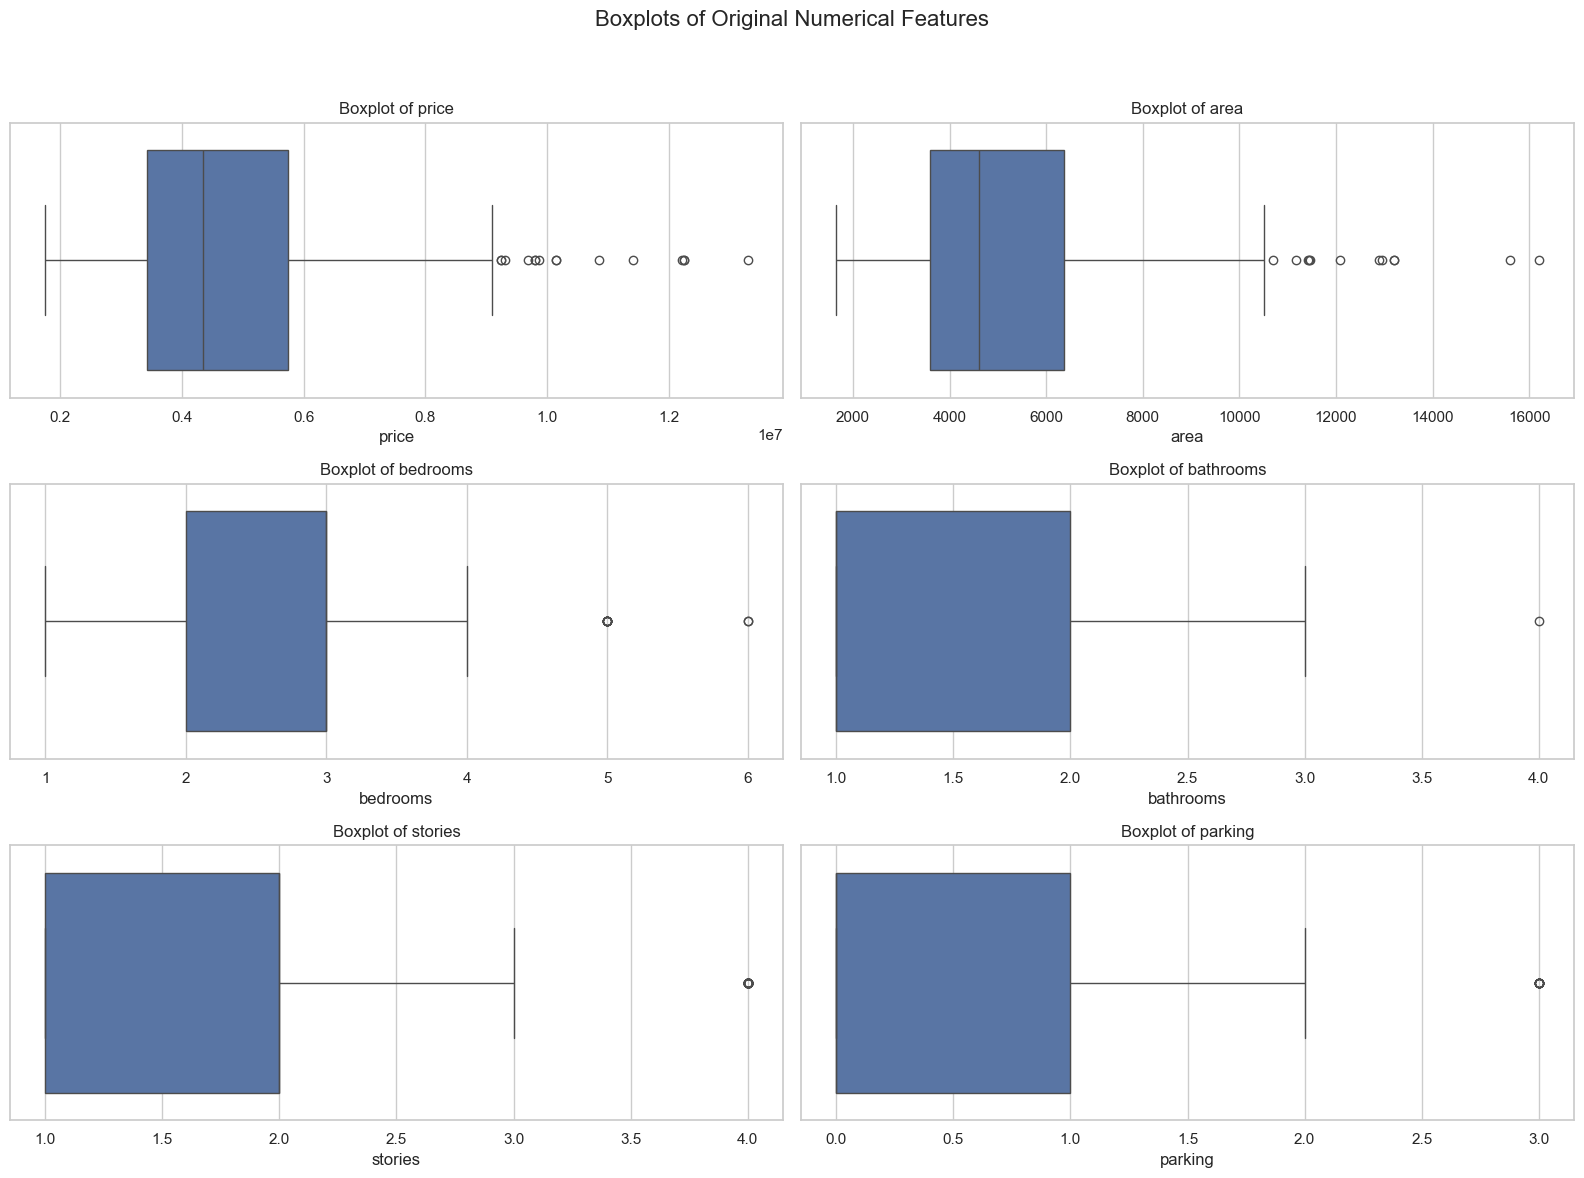

In [255]:
# Select only original numerical features (excluding log-transformed columns)
num_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.endswith('_log')]

# Define the number of rows and columns for the subplot grid
n_cols = 2  # Number of columns
n_rows = (len(num_features) + n_cols - 1) // n_cols  # Calculate required rows based on number of features

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
fig.suptitle('Boxplots of Original Numerical Features', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each numerical feature in a separate subplot
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Remove any empty subplots if there are fewer plots than grid spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title
plt.show()

In [284]:
# Create an empty DataFrame to store outliers
outliers_list = []

# Select only numerical columns
num_features = df.select_dtypes(include=[np.number]).columns

# Identify outliers using the Z-score method
for col in num_features:
    df[f'{col}_zscore'] = np.abs(stats.zscore(df[col]))
    outliers = df[df[f'{col}_zscore'] > 3]
    if not outliers.empty:
        for index, row in outliers.iterrows():
            outliers_list.append([row[col], row[f'{col}_zscore'], col])
    df.drop(columns=[f'{col}_zscore'], inplace=True)

# Convert the list of outliers to a DataFrame
outliers_df = pd.DataFrame(outliers_list, columns=['Outlier Value', 'Z-Score', 'Feature'])

# Display the outliers in a structured format
print("Outliers Detected by Z-score Method:")
display(outliers_df)


Outliers Detected by Z-score Method:


,Outlier Value,Z-Score,Feature
0,13300000,4.566365,price
1,12250000,4.004484,price
2,12250000,4.004484,price
3,12215000,3.985755,price
4,11410000,3.554979,price
5,10850000,3.255309,price
6,16200,5.096263,area
7,13200,3.712595,area
8,13200,3.712595,area
9,12090,3.200637,area


### 6. Feature Engineering (Optional)
   - **Transformations**:
     - Apply log or square root transformations to skewed features if needed.
   - **Encoding**:
     - Convert categorical features using one-hot encoding or ordinal encoding if needed for modeling.
   - **Interaction Features**:
     - Create new features based on domain knowledge or interactions between existing features if beneficial.

In [206]:
# Log transformation for skewed numerical features
for col in num_features:
    if df[col].skew() > 0.75:
        df[f'{col}_log'] = np.log1p(df[col])
        
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)
df_encoded

,price,area,bedrooms,bathrooms,stories,parking,House Price_log,price_log,area_log,bathrooms_log,stories_log,parking_log,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,16.403275,16.403275,8.912069,1.098612,1.386294,1.098612,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,16.321037,16.321037,9.100637,1.609438,1.609438,1.386294,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,16.321037,16.321037,9.206433,1.098612,1.098612,1.098612,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,16.318175,16.318175,8.922792,1.098612,1.098612,1.386294,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,16.250001,16.250001,8.912069,0.693147,1.098612,1.098612,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,14.414348,14.414348,8.006701,0.693147,0.693147,1.098612,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,14.384879,14.384879,7.783641,0.693147,0.693147,0.000000,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,14.375127,14.375127,8.194506,0.693147,0.693147,0.000000,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,14.375127,14.375127,7.976252,0.693147,0.693147,0.000000,False,False,False,False,False,False,False,False


In [288]:
# Creating a pivot table to examine the average price based on furnishing status and air conditioning
pivot_table = df.pivot_table(values='price', index='furnishingstatus', columns='airconditioning', aggfunc='mean')
# Displaying the pivot table for analysis
pivot_table_display = pivot_table.reset_index()  # Resetting index to display as a DataFrame
pivot_table_display

airconditioning,furnishingstatus,no,yes
0,furnished,4.469500e+06,6.786717e+06
1,semi-furnished,4.557951e+06,5.778769e+06
2,unfurnished,3.583342e+06,5.286167e+06


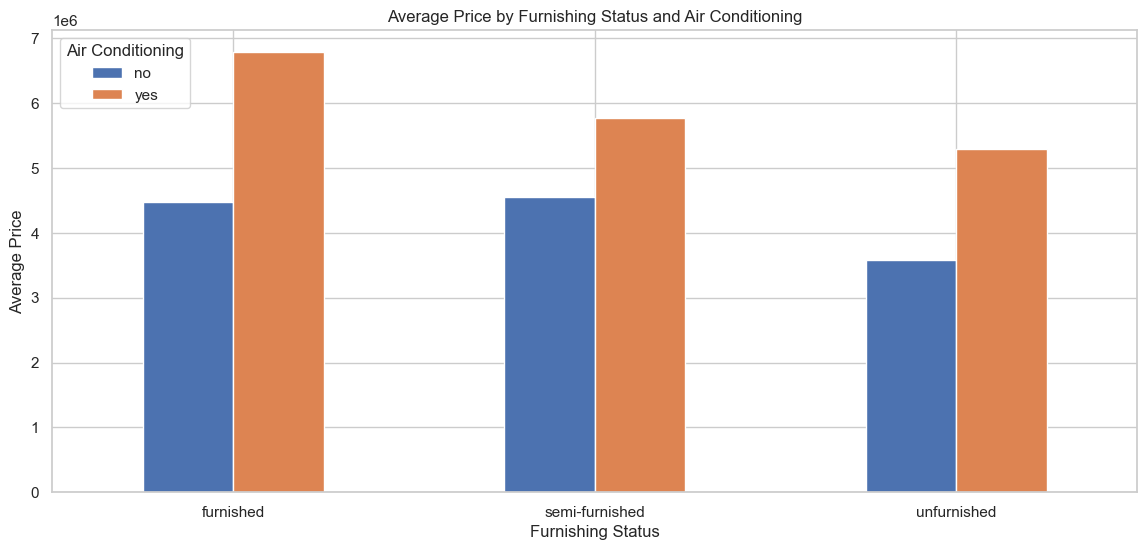

In [290]:
# Plotting the grouped bar chart to visualize the effect of furnishing status and air conditioning on price
pivot_table.plot(kind='bar', figsize=(14, 6))
plt.title("Average Price by Furnishing Status and Air Conditioning")
plt.xlabel("Furnishing Status")
plt.ylabel("Average Price")
plt.legend(title="Air Conditioning", loc='upper left')
plt.xticks(rotation=0)
plt.show()# Plotting the grouped bar chart to visualize the effect of furnishing status and air conditioning on price

### 7. Summary of Insights
   - Document key findings from EDA, highlighting variables with significant patterns or relationships with house prices.
   - Note any data issues (e.g., skewness, outliers, missing values) and proposed treatments, which may help guide the next steps in data preprocessing or model building.

### 7. Summary of Insights

1. **Top Drivers of Property Value**:
   - **Furnishing Status** and **Air Conditioning** are major price boosters. Fully furnished properties with air conditioning command the highest average prices across all categories.
   - **Area** and **Number of Bathrooms** are strong predictors of higher property prices, with larger areas and more bathrooms correlating with increased value.

2. **Furnishing Status Impact**:
   - **Furnished properties** consistently have the highest average prices, followed by **semi-furnished** and **unfurnished**. Furnishing adds significant value, especially in larger or multi-bedroom properties.
   - The price premium from furnishing grows in properties with additional features like air conditioning, mainroad access, and preferred area locations.

3. **Added Value of Air Conditioning**:
   - Properties with air conditioning consistently command higher prices, regardless of furnishing status. The effect is most pronounced in fully furnished homes, highlighting its appeal in high-end properties.
   - Even in unfurnished homes, air conditioning adds value, though these properties still lag in overall price compared to furnished or semi-furnished options.

4. **Location and Accessibility**:
   - **Mainroad access** and **preferred area** are positively associated with property value, especially when combined with full furnishing. These features enhance accessibility and desirability, adding further appeal to properties.

5. **Distribution and Outliers**:
   - Both **price** and **area** distributions are right-skewed, with high-value outliers representing premium properties. Bedrooms, bathrooms, stories, and parking are concentrated around standard configurations, with occasional outliers indicating larger, more exclusive properties.

6. **Feature Combinations**:
   - Premium features like **guestroom, hotwaterheating, and multi-story layouts** increase average prices, particularly in fully furnished homes. These combinations appeal to buyers seeking more upscale, ready-to-use properties.
  
7. **Limited Impact Features**:
   - **Basement** and **hotwaterheating** add minimal value on their own, indicating they’re not primary price drivers. However, when paired with furnishing and air conditioning, they may contribute marginally to overall appeal.

This summary highlights that **furnishing status**, **air conditioning**, and **area** are the key drivers of property value, with certain amenities and location features enhancing premium appeal. The right combination of these factors aligns with higher property values, especially for fully furnished and amenity-rich homes.